## Customizing plots

### Multiple plots on single axis

In [1]:
import pandas as pd
from pprint import pprint as pp
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
from pathlib import Path
import numpy as np
from sklearn.datasets import load_iris
import os

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
def create_dir_save_file(dir_path: Path, url: str):
    """
    Check if the path exists and create it if it does not.
    Check if the file exists and download it if it does not.
    """
    if not dir_path.parents[0].exists():
        dir_path.parents[0].mkdir(parents=True)
        print(f"Directory Created: {dir_path.parents[0]}")
    else:
        print("Directory Exists")

    if not dir_path.exists():
        r = requests.get(url, allow_redirects=True)
        open(dir_path, "wb").write(r.content)
        print(f"File Created: {dir_path.name}")
    else:
        print("File Exists")

<IPython.core.display.Javascript object>

### Customizing plots 

Reminder session

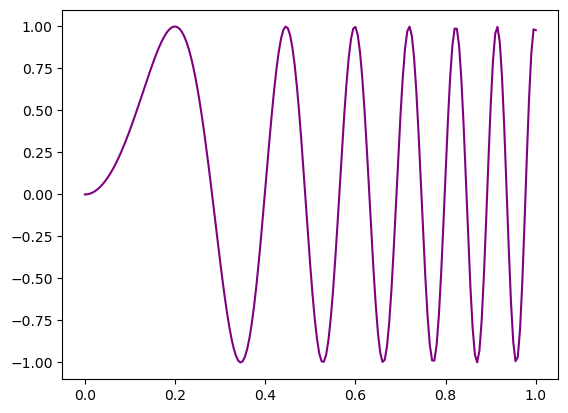

<IPython.core.display.Javascript object>

In [4]:
x = np.linspace(0, 1, 201)
y = np.sin((2 * np.pi * x) ** 2)
plt.plot(x, y, "purple")
plt.show()

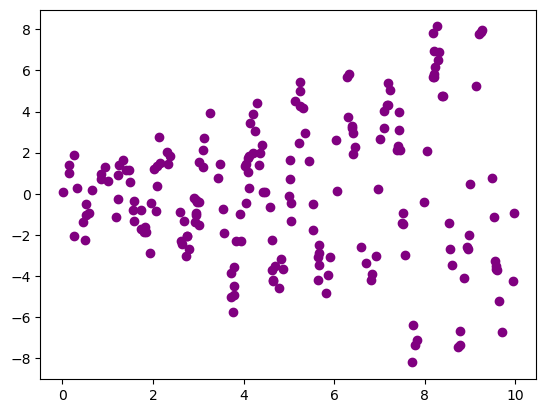

<IPython.core.display.Javascript object>

In [5]:
np.random.seed(256)
x = 10 * np.random.rand(200, 1)
y = (0.2 + 0.8 * x) * np.sin(2 * np.pi * x) + np.random.randn(200, 1)
plt.scatter(x, y, color="purple")
plt.show()

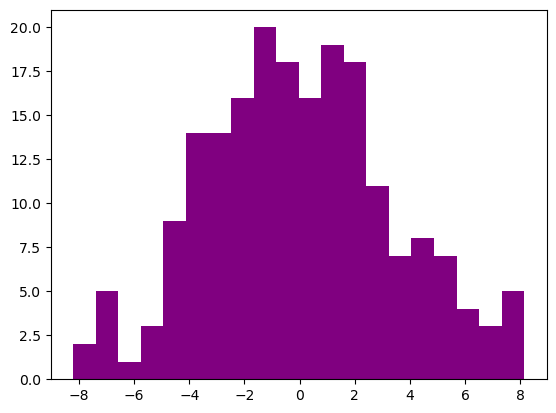

<IPython.core.display.Javascript object>

In [6]:
np.random.seed(256)
x = 10 * np.random.rand(200, 1)
y = (0.2 + 0.8 * x) * np.sin(2 * np.pi * x) + np.random.randn(200, 1)
plt.hist(y, bins=20, color="purple")
plt.show()

In [7]:
austin_weather_url = "https://assets.datacamp.com/production/repositories/497/datasets/4d7b2bc6b10b527dc297707fb92fa46b10ac1be5/weather_data_austin_2010.csv"
austin_weather_path = Path("data/weather_data_austin_2010.csv")
create_dir_save_file(austin_weather_path, austin_weather_url)
df_weather = pd.read_csv(austin_weather_path)
df_weather.Date = pd.to_datetime(df_weather.Date)
df_weather.set_index("Date", drop=True, inplace=True)

Directory Exists
File Exists


<IPython.core.display.Javascript object>

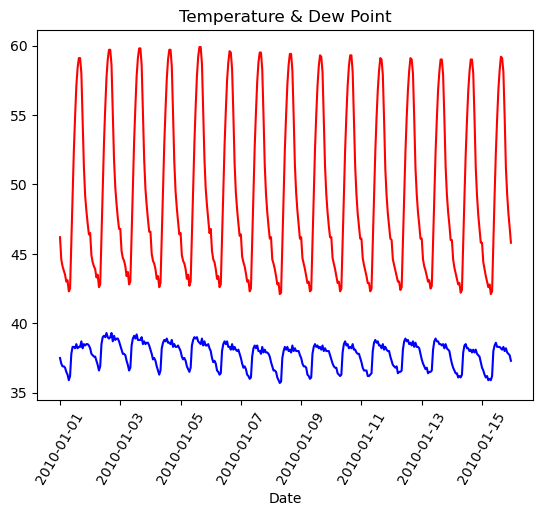

<IPython.core.display.Javascript object>

In [8]:
temperature = df_weather["Temperature"]["2010-01-01":"2010-01-15"]
dewpoint = df_weather["DewPoint"]["2010-01-01":"2010-01-15"]
t = temperature.index

plt.plot(t, temperature, "red")
plt.plot(t, dewpoint, "blue")  # Appears on same axes
plt.xlabel("Date")
plt.title("Temperature & Dew Point")
plt.xticks(rotation=60)
plt.show()  # Renders plot objects to screen

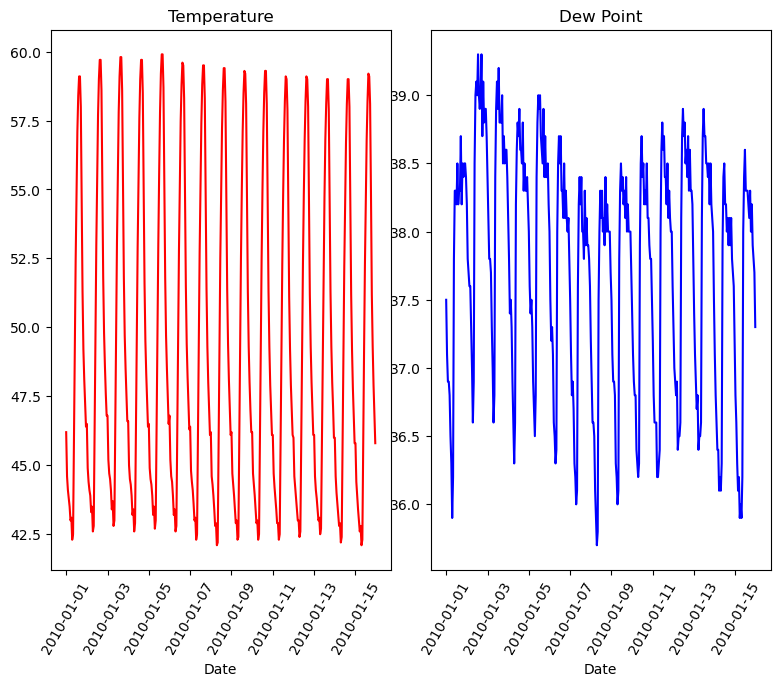

<IPython.core.display.Javascript object>

In [9]:
plt.figure(figsize=(8, 6))

plt.axes([0.05, 0.05, 0.425, 0.9])
plt.plot(t, temperature, "red")
plt.xlabel("Date")
plt.title("Temperature")
plt.xticks(rotation=60)
plt.axes([0.525, 0.05, 0.425, 0.9])
plt.plot(t, dewpoint, "blue")
plt.xlabel("Date")
plt.title("Dew Point")
plt.xticks(rotation=60)
plt.show()

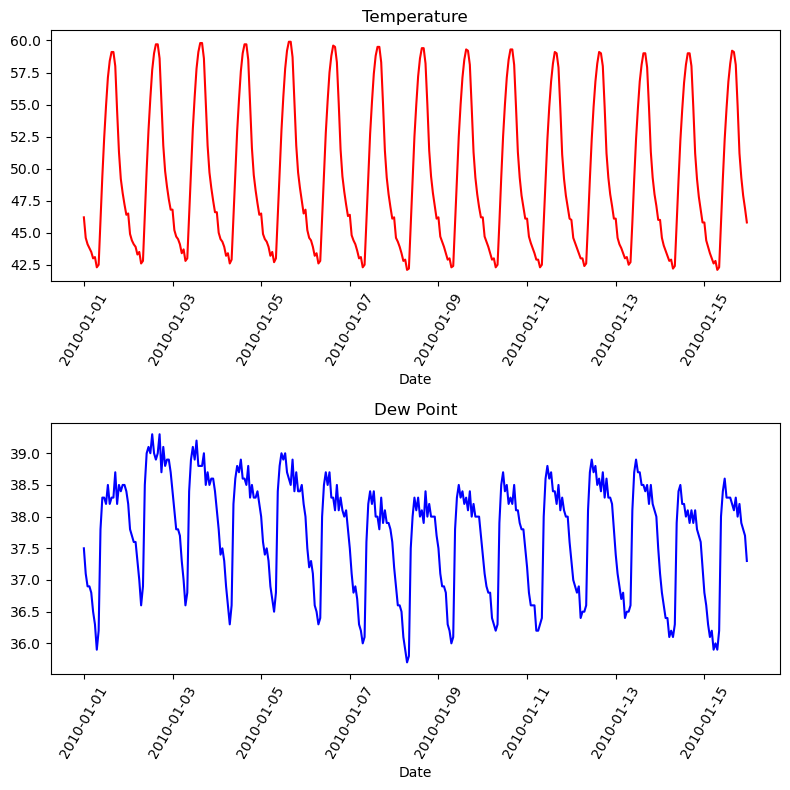

<IPython.core.display.Javascript object>

In [10]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(t, temperature, "red")
plt.xlabel("Date")
plt.title("Temperature")
plt.xticks(rotation=60)
plt.subplot(2, 1, 2)
plt.plot(t, dewpoint, "blue")
plt.xlabel("Date")
plt.title("Dew Point")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

#### To the course

In [11]:
df_women = pd.read_csv(
    "https://assets.datacamp.com/production/course_1761/datasets/percent-bachelors-degrees-women-usa.csv"
)
print(df_women.head(2))

year = df_women["Year"]
physical_sciences = df_women["Physical Sciences"]
computer_science = df_women["Computer Science"]
education = df_women["Education"]
health = df_women["Health Professions"]

   Year  Agriculture  Architecture  Art and Performance    Biology  Business  \
0  1970     4.229798     11.921005                 59.7  29.088363  9.064439   
1  1971     5.452797     12.003106                 59.9  29.394403  9.503187   

   Communications and Journalism  Computer Science  Education  Engineering  \
0                           35.3              13.6  74.535328          0.8   
1                           35.5              13.6  74.149204          1.0   

     English  Foreign Languages  Health Professions  Math and Statistics  \
0  65.570923               73.8                77.1                 38.0   
1  64.556485               73.9                75.5                 39.0   

   Physical Sciences  Psychology  Public Administration  \
0               13.8        44.4                   68.4   
1               14.9        46.2                   65.5   

   Social Sciences and History  
0                         36.8  
1                         36.2  


<IPython.core.display.Javascript object>

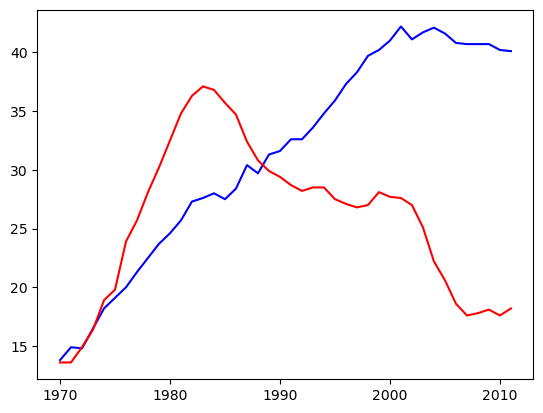

<IPython.core.display.Javascript object>

In [12]:
# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(df_women.Year, df_women['Physical Sciences'], c='blue')

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(df_women.Year, df_women['Computer Science'], c='red')

# Display the plot
plt.show()


It looks like, for the last 25 years or so, more women have been awarded undergraduate degrees in the Physical Sciences than in Computer Science.

### Using axes()

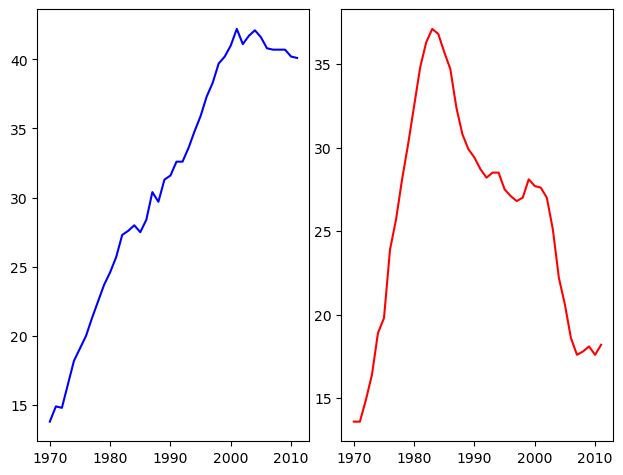

<IPython.core.display.Javascript object>

In [13]:
# Create plot axes for the first line plot
plt.axes([0.05, 0.05, 0.425, 0.9])

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(df_women.Year, df_women["Physical Sciences"], c="blue")

# Create plot axes for the second line plot
plt.axes([0.525, 0.05, 0.425, 0.9])

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(df_women.Year, df_women["Computer Science"], c="red")

# Display the plot
plt.show()

### Using subplot() (1)

The command plt.axes() requires a lot of effort to use well because the coordinates of the axes need to be set manually. A better alternative is to use plt.subplot() to determine the layout automatically. You will use plt.subplot(m, n, k) to make the subplot grid of dimensions m by n and to make the kth subplot active (subplots are numbered starting from 1 row-wise from the top left corner of the subplot grid).

* plt.subplot(4, 2, 1) means 4 times smaller than the next graph plt.subplot(1, 2, 2)
* plt.subplot(4, 2, 1), third argument 1 means, this graph is displayed before the next plt.subplot(1, 2, 2)


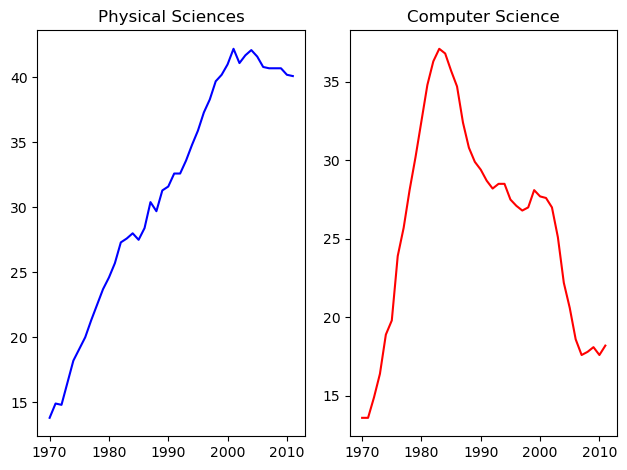

<IPython.core.display.Javascript object>

In [14]:
# Create a figure with 1x2 subplot and make the left subplot active
plt.subplot(1, 2, 1)

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(df_women.Year, df_women["Physical Sciences"], c="blue")
plt.title("Physical Sciences")

# Make the right subplot active in the current 1x2 subplot grid
plt.subplot(1, 2, 2)

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(df_women.Year, df_women["Computer Science"], c="red")
plt.title("Computer Science")

# Use plt.tight_layout() to improve the spacing between subplots
plt.tight_layout()
plt.show()

### Using subplot() (2)

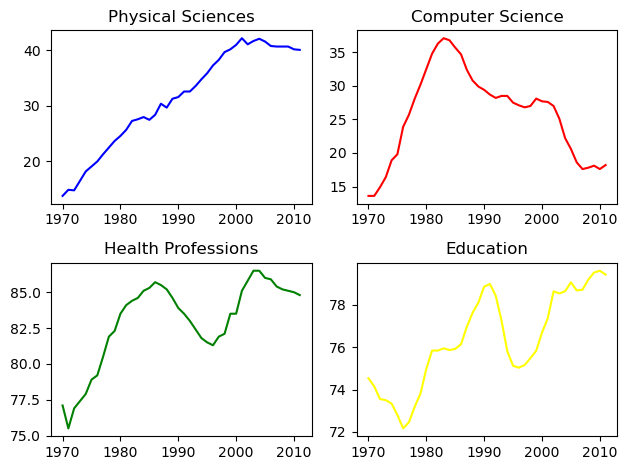

<IPython.core.display.Javascript object>

In [15]:
# Create a figure with 2x2 subplot layout and make the top left subplot active
plt.subplot(2, 2, 1)

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color="blue")
plt.title("Physical Sciences")

# Make the top right subplot active in the current 2x2 subplot grid
plt.subplot(2, 2, 2)

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, color="red")
plt.title("Computer Science")

# Make the bottom left subplot active in the current 2x2 subplot grid
plt.subplot(2, 2, 3)

# Plot in green the % of degrees awarded to women in Health Professions
plt.plot(year, health, color="green")
plt.title("Health Professions")

# Make the bottom right subplot active in the current 2x2 subplot grid
plt.subplot(2, 2, 4)

# Plot in yellow the % of degrees awarded to women in Education
plt.plot(year, education, color="yellow")
plt.title("Education")

# Improve the spacing between subplots and display them
plt.tight_layout()
plt.show()

### Using limits with GDP over time

In [16]:
gdp_url = "https://assets.datacamp.com/production/repositories/516/datasets/a0858a700501f88721ca9e4bdfca99b9e10b937f/GDP.zip"
save_to = Path("data/gdp.zip")

<IPython.core.display.Javascript object>

In [17]:
create_dir_save_file(save_to, gdp_url)

Directory Exists
File Exists


<IPython.core.display.Javascript object>

In [18]:
zf = zipfile.ZipFile(save_to)
df_gdp = pd.read_csv(zf.open("GDP/gdp_usa.csv"))
df_gdp.DATE = pd.to_datetime(df_gdp.DATE)
df_gdp["YEAR"] = pd.DatetimeIndex(df_gdp.DATE).year

<IPython.core.display.Javascript object>

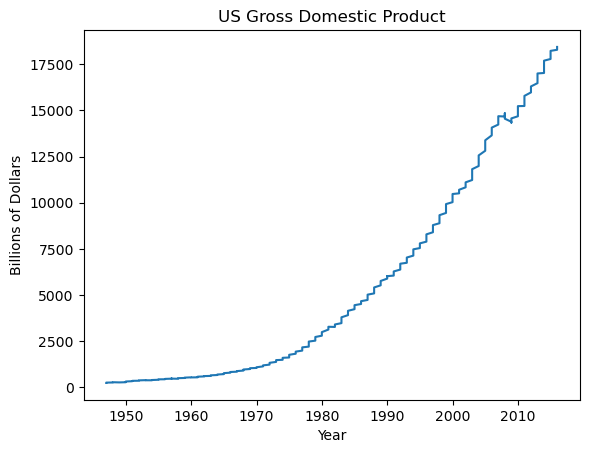

<IPython.core.display.Javascript object>

In [19]:
plt.plot(df_gdp.YEAR, df_gdp.VALUE)
plt.xlabel("Year")
plt.ylabel("Billions of Dollars")
plt.title("US Gross Domestic Product")
plt.show()

### Using xlim(), ylim()

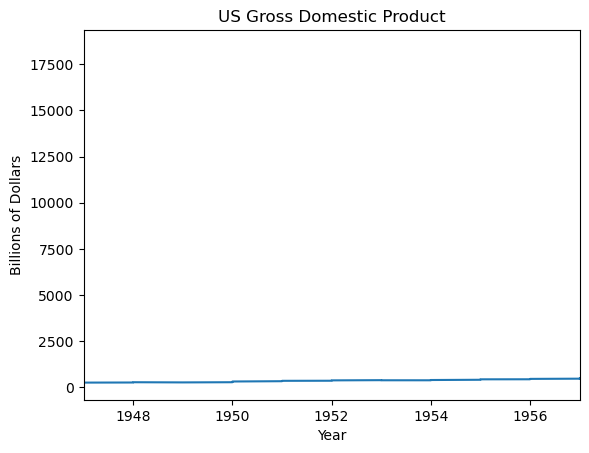

<IPython.core.display.Javascript object>

In [20]:
# Only XLIM
plt.plot(df_gdp.YEAR, df_gdp.VALUE)
plt.xlabel("Year")
plt.ylabel("Billions of Dollars")
plt.title("US Gross Domestic Product")
plt.xlim((1947, 1957))
plt.show()

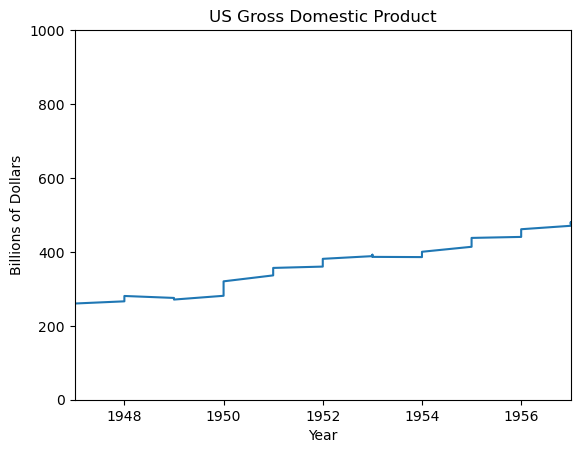

<IPython.core.display.Javascript object>

In [21]:
## Using XLIM & YLIM
plt.plot(df_gdp.YEAR, df_gdp.VALUE)
plt.xlabel("Year")
plt.ylabel("Billions of Dollars")
plt.title("US Gross Domestic Product")
plt.xlim((1947, 1957))
plt.ylim((0, 1000))
plt.show()

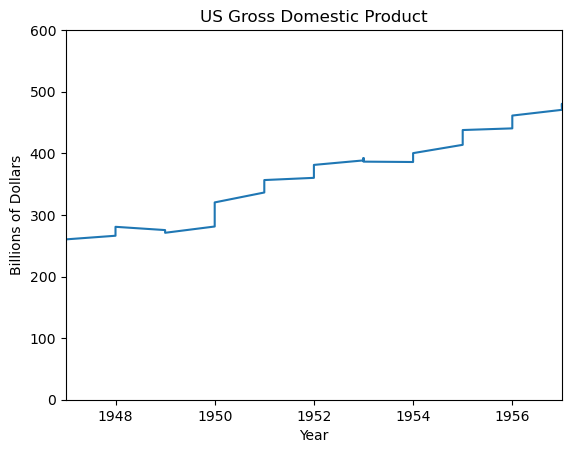

<IPython.core.display.Javascript object>

In [22]:
plt.plot(df_gdp.YEAR, df_gdp.VALUE)
plt.xlabel("Year")
plt.ylabel("Billions of Dollars")
plt.title("US Gross Domestic Product")
plt.axis((1947, 1957, 0, 600))  ## using axis
plt.show()

Other axis() options

| Invocation     | Result                               |
|----------------|--------------------------------------|
| axis('off')    | turns off axis lines, labels         |
| axis('equal')  | equal scaling on x, y axes           |
| axis('square') | forces square plot                   |
| axis('tight')  | sets xlim(), ylim() to show all data |

#### Using `axis('equal')`

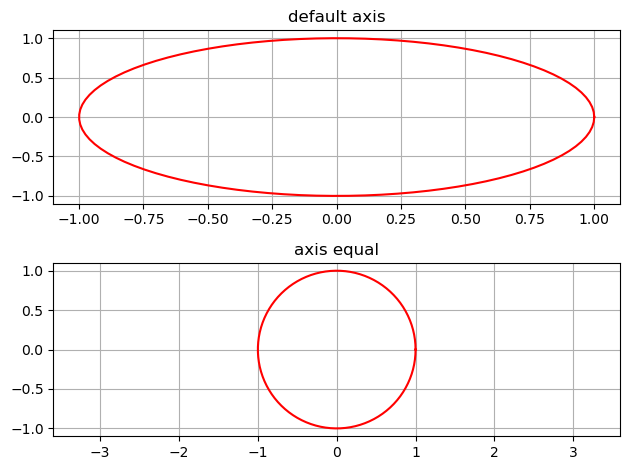

<IPython.core.display.Javascript object>

In [23]:
np.random.seed(555)
t = np.linspace(0, 2 * np.pi, 100)
xc = 0.0
yc = 0.0
r = 1
x = r * np.cos(t) + xc
y = r * np.sin(t) + yc

plt.subplot(2, 1, 1)
plt.plot(x, y, "red")
plt.grid(True)
plt.title("default axis")
plt.subplot(2, 1, 2)
plt.plot(x, y, "red")
plt.grid(True)
plt.axis("equal")
plt.title("axis equal")
plt.tight_layout()
plt.show()

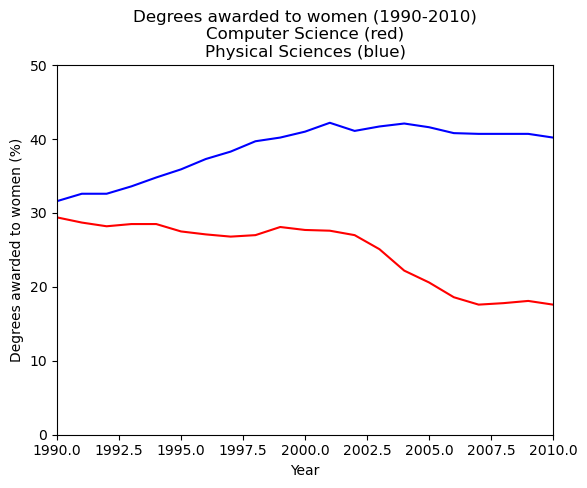

<IPython.core.display.Javascript object>

In [24]:
# Plot the % of degrees awarded to women in Computer Science and the Physical Sciences
plt.plot(year, computer_science, color="red")
plt.plot(year, physical_sciences, color="blue")

# Add the axis labels
plt.xlabel("Year")
plt.ylabel("Degrees awarded to women (%)")

# Set the x-axis range
plt.xlim(1990, 2010)

# Set the y-axis range
plt.ylim(0, 50)

# Add a title and display the plot
plt.title(
    "Degrees awarded to women (1990-2010)\nComputer Science (red)\nPhysical Sciences (blue)"
)
plt.show()

### Using axis()

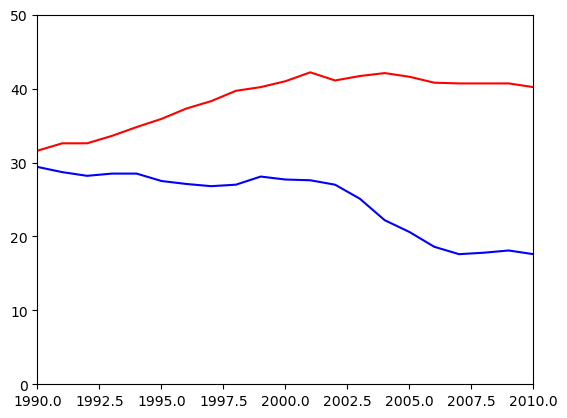

<IPython.core.display.Javascript object>

In [25]:
# Plot in blue the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, color="blue")

# Plot in red the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color="red")

# Set the x-axis and y-axis limits
plt.axis((1990, 2010, 0, 50))

# Show the figure
plt.show()

### Using legend()

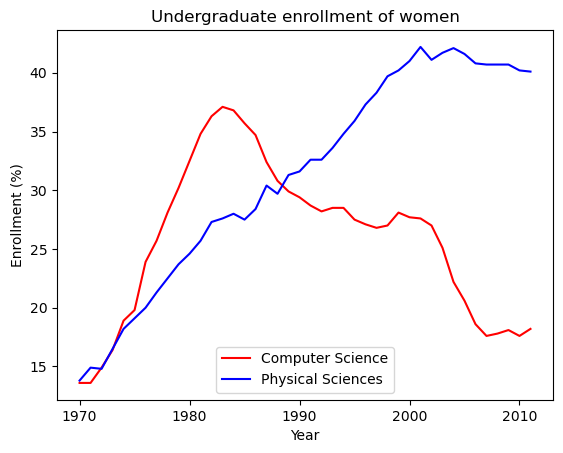

<IPython.core.display.Javascript object>

In [26]:
# Specify the label 'Computer Science'
plt.plot(year, computer_science, color='red', label='Computer Science') 

# Specify the label 'Physical Sciences' 
plt.plot(year, physical_sciences, color='blue', label='Physical Sciences')

# Add a legend at the lower center
plt.legend(loc='lower center')

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Enrollment (%)')
plt.title('Undergraduate enrollment of women')
plt.show()


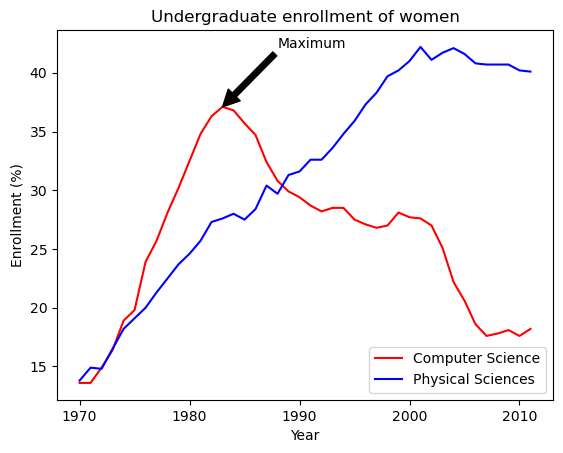

<IPython.core.display.Javascript object>

In [27]:
# Plot with legend as before
plt.plot(year, computer_science, color="red", label="Computer Science")
plt.plot(year, physical_sciences, color="blue", label="Physical Sciences")
plt.legend(loc="lower right")

# Compute the maximum enrollment of women in Computer Science: cs_max
cs_max = computer_science.max()

# Calculate the year in which there was maximum enrollment of women in Computer Science: yr_max
yr_max = year[computer_science.argmax()]

# Add a black arrow annotation
plt.annotate(
    "Maximum",
    xy=(yr_max, cs_max),
    xytext=(yr_max + 5, cs_max + 5),
    arrowprops=dict(facecolor="black"),
)

# Add axis labels and title
plt.xlabel("Year")
plt.ylabel("Enrollment (%)")
plt.title("Undergraduate enrollment of women")
plt.show()

### Modifying styles

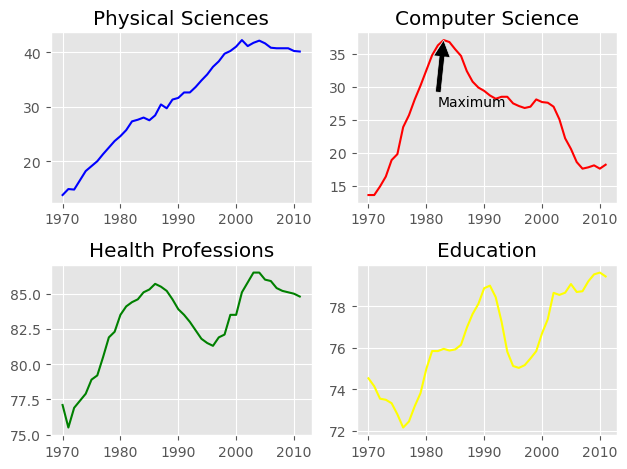

<IPython.core.display.Javascript object>

In [28]:
# Set the style to 'ggplot'
plt.style.use("ggplot")

# Create a figure with 2x2 subplot layout
plt.subplot(2, 2, 1)

# Plot the enrollment % of women in the Physical Sciences
plt.plot(year, physical_sciences, color="blue")
plt.title("Physical Sciences")

# Plot the enrollment % of women in Computer Science
plt.subplot(2, 2, 2)
plt.plot(year, computer_science, color="red")
plt.title("Computer Science")

# Add annotation
cs_max = computer_science.max()
yr_max = year[computer_science.argmax()]
plt.annotate(
    "Maximum",
    xy=(yr_max, cs_max),
    xytext=(yr_max - 1, cs_max - 10),
    arrowprops=dict(facecolor="black"),
)

# Plot the enrollmment % of women in Health professions
plt.subplot(2, 2, 3)
plt.plot(year, health, color="green")
plt.title("Health Professions")

# Plot the enrollment % of women in Education
plt.subplot(2, 2, 4)
plt.plot(year, education, color="yellow")
plt.title("Education")

# Improve spacing between subplots and display them
plt.tight_layout()
plt.show()

Visualizing Regressions
seaborn
The Python Graph Gallery
Recap: Pandas DataFrames

Labelled tabular data structure

Labels on rows: index

Labels on columns: columns

Columns are Pandas Series

In [29]:
tips = sns.load_dataset("tips")
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

<IPython.core.display.Javascript object>

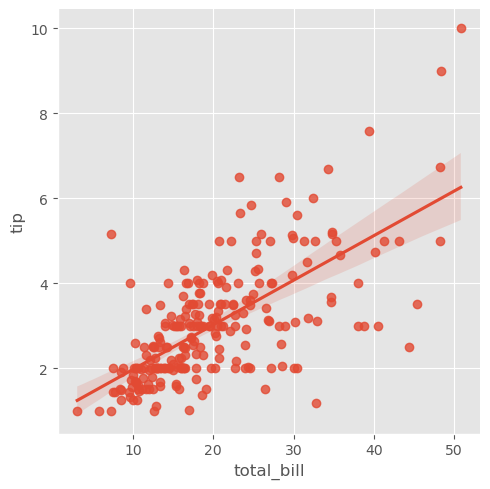

<IPython.core.display.Javascript object>

In [30]:
# Linear Regression Plots
sns.lmplot(x="total_bill", y="tip", data=tips)
plt.show()

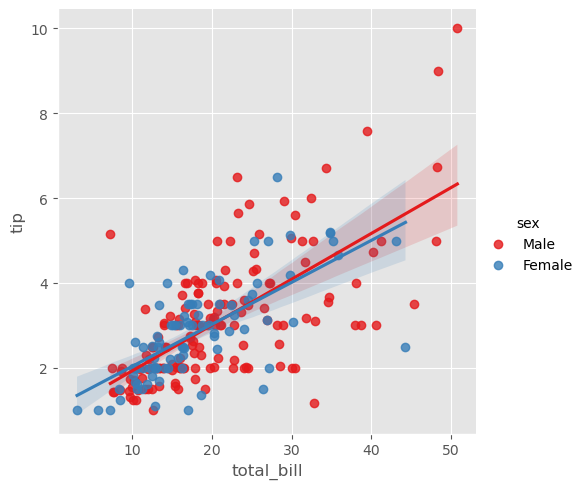

<IPython.core.display.Javascript object>

In [31]:
# Factors & Grouping Factors (same plot)
sns.lmplot(x="total_bill", y="tip", data=tips, hue="sex", palette="Set1")
plt.show()

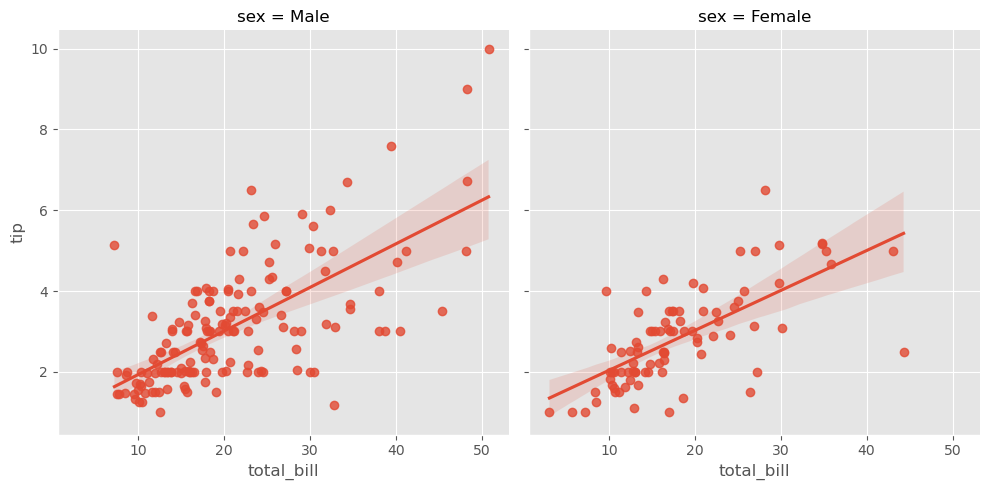

<IPython.core.display.Javascript object>

In [32]:
# Grouping Factors (subplots)
sns.lmplot(x="total_bill", y="tip", data=tips, col="sex")
plt.show()

Residual Plots

Similar arguments as lmplot() but more flexible
x, y can be arrays or strings
data is DataFrame (optional)
Optional arguments (e.g., color) as in Matplotlib

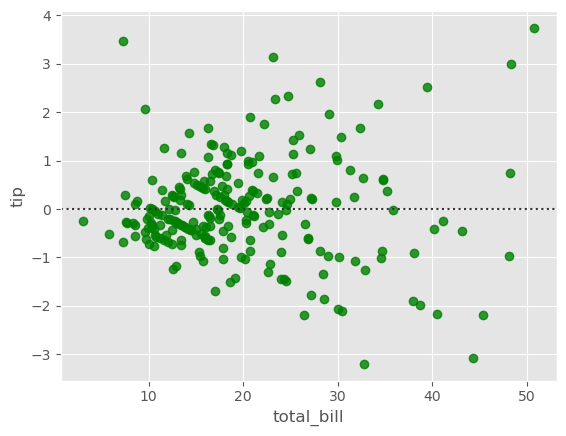

<IPython.core.display.Javascript object>

In [33]:
sns.residplot(x="total_bill", y="tip", data=tips, color="green")
plt.show()

#### Visualizing Univariate Distributions

- Univariate → “one variable”
- Visualization techniques for sampled univariate data
- Strip plots
- Swarm plots
- Violin plots

Using `stripplot()`

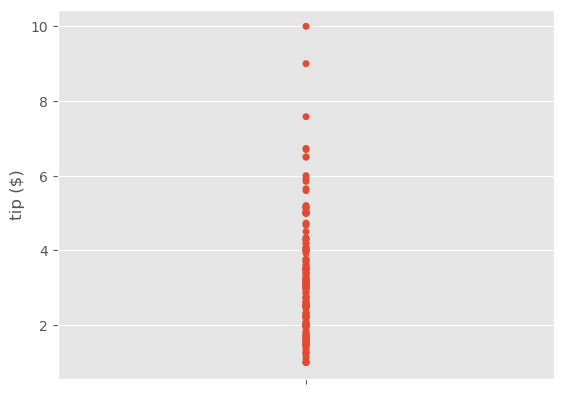

<IPython.core.display.Javascript object>

In [34]:
sns.stripplot(y="tip", data=tips, jitter=False)
plt.ylabel("tip ($)")
plt.show()

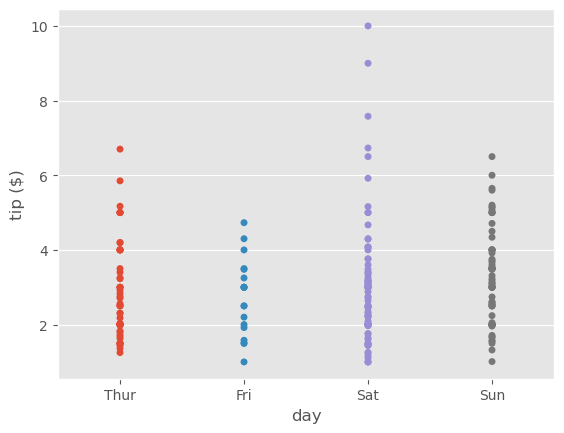

<IPython.core.display.Javascript object>

In [35]:
# Grouping
sns.stripplot(x="day", y="tip", data=tips, jitter=False)
plt.ylabel("tip ($)")
plt.show()

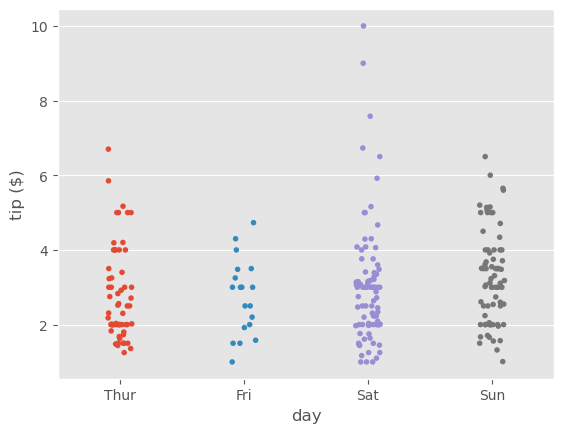

<IPython.core.display.Javascript object>

In [36]:
# Spreading out
sns.stripplot(x="day", y="tip", data=tips, jitter=True, size=4)
plt.ylabel("tip ($)")
plt.show()

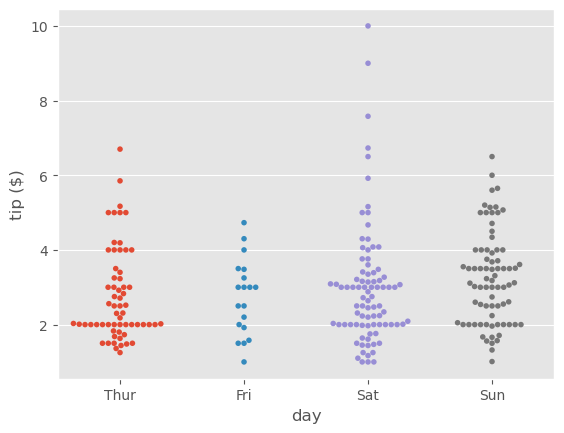

<IPython.core.display.Javascript object>

In [37]:
# Swarmplot
sns.swarmplot(x="day", y="tip", data=tips, size=4)
plt.ylabel("tip ($)")
plt.show()

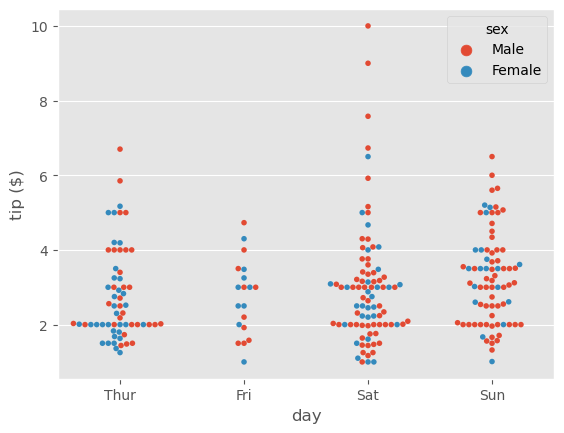

<IPython.core.display.Javascript object>

In [38]:
# More grouping
sns.swarmplot(x="day", y="tip", data=tips, size=4, hue="sex")
plt.ylabel("tip ($)")
plt.show()

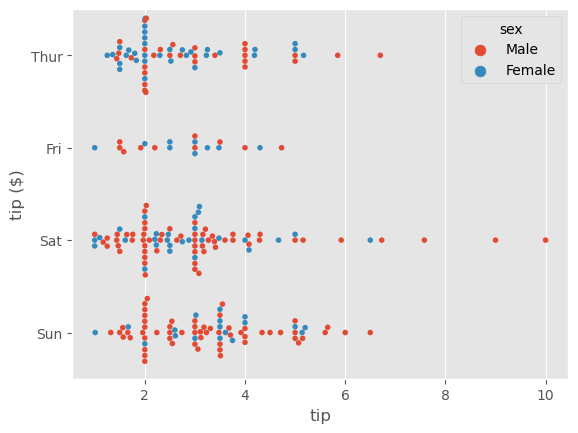

<IPython.core.display.Javascript object>

In [39]:
# Orientation change
sns.swarmplot(x="tip", y="day", data=tips, size=4, hue="sex", orient="h")
plt.ylabel("tip ($)")
plt.show()

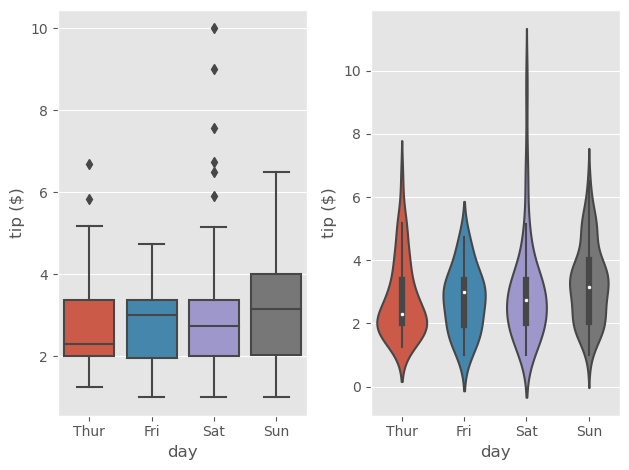

<IPython.core.display.Javascript object>

In [40]:
# violinplot
plt.subplot(1, 2, 1)
sns.boxplot(x="day", y="tip", data=tips)
plt.ylabel("tip ($)")
plt.subplot(1, 2, 2)
sns.violinplot(x="day", y="tip", data=tips)
plt.ylabel("tip ($)")
plt.tight_layout()
plt.show()

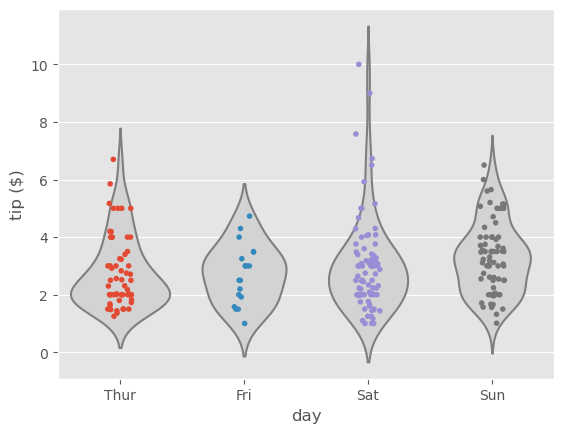

<IPython.core.display.Javascript object>

In [41]:
# Combining violin and strip
sns.violinplot(x="day", y="tip", data=tips, inner=None, color="lightgray")
sns.stripplot(x="day", y="tip", data=tips, size=4, jitter=True)
plt.ylabel("tip ($)")
plt.show()

## Plotting 2D arrays

### Generating meshes


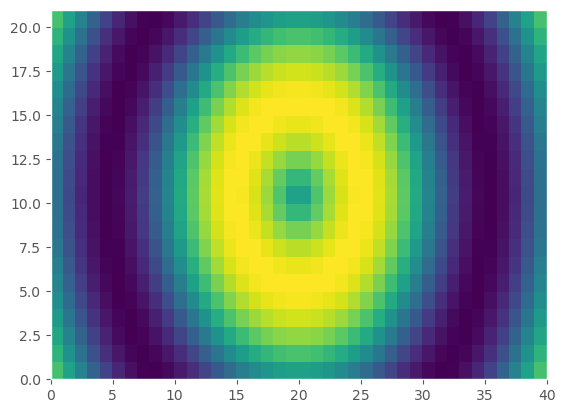

<Figure size 640x480 with 0 Axes>

<IPython.core.display.Javascript object>

In [42]:


# Generate two 1-D arrays: u, v
u = np.linspace(-2, 2, 40)
v = np.linspace(-1, 1, 21)

# Generate 2-D arrays from u and v: X, Y
X,Y = np.meshgrid(u, v)

# Compute Z based on X and Y
Z = np.sin(3*np.sqrt(X**2 + Y**2)) 

# Display the resulting image with pcolor()
plt.pcolor(Z)
plt.show()

# Save the figure to 'sine_mesh.png'
plt.savefig('saved/sine_mesh.png')


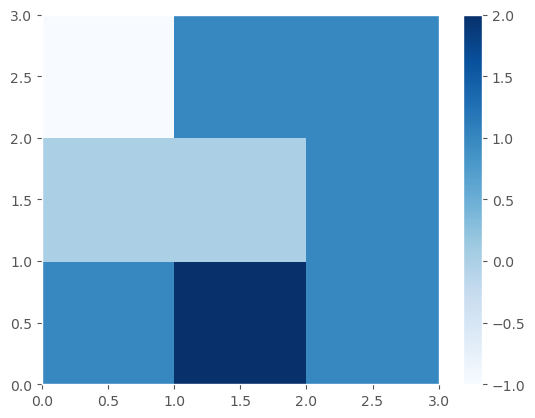

None


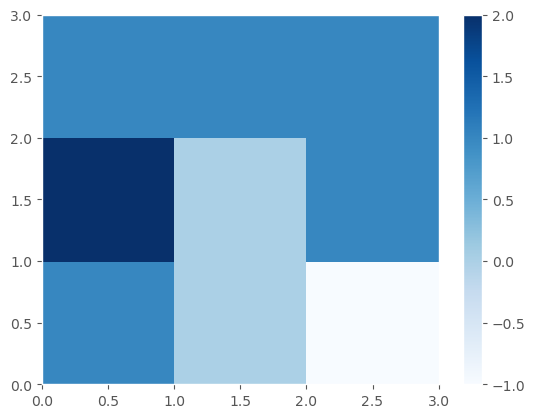

None


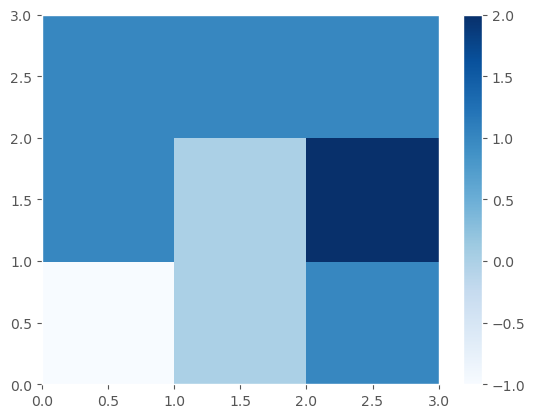

None


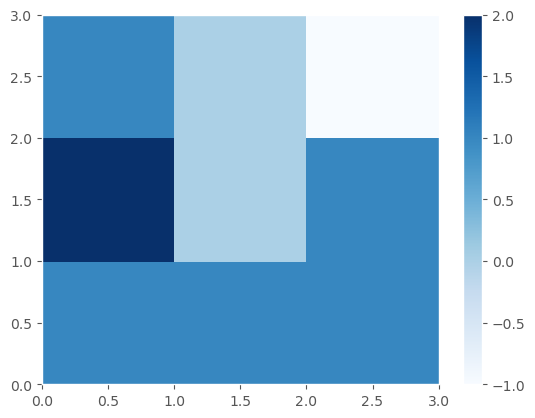

None


<IPython.core.display.Javascript object>

In [43]:
import matplotlib.pyplot as plt


def myfunc(A):
    plt.pcolor(A, cmap="Blues")
    plt.colorbar()
    plt.show()


print(myfunc(np.array([[1, 2, 1], [0, 0, 1], [-1, 1, 1]])))
print(myfunc(np.array([[1, 0, -1], [2, 0, 1], [1, 1, 1]])))
print(myfunc(np.array([[-1, 0, 1], [1, 0, 2], [1, 1, 1]])))
print(myfunc(np.array([[1, 1, 1], [2, 0, 1], [1, 0, -1]])))

### Contour & filled contour plots

* plt.imshow()
* plt.pcolor() 

are often used to visualize a 2-D array in entirety, there are other ways of visualizing such data **without displaying all the available sample values**. One option is to use the array to compute contours that are visualized instead.

Two types of contour plot supported by Matplotlib are:

* plt.contour()
* plt.contourf() 

where the former displays the contours as lines and the latter displayed filled areas between contours. Both these plotting commands accept a two dimensional array from which the appropriate contours are computed.


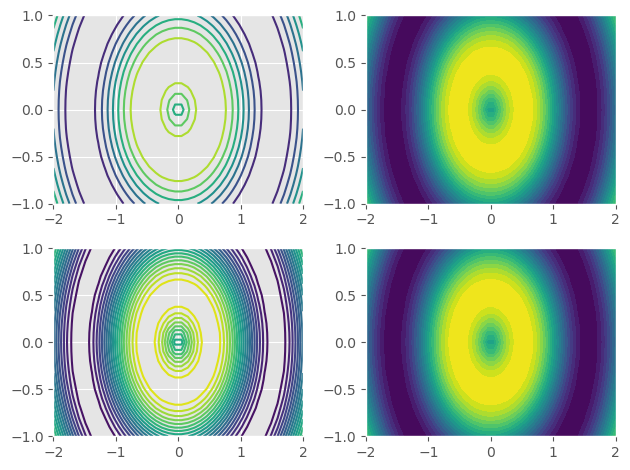

<IPython.core.display.Javascript object>

In [44]:
# Generate a default contour map of the array Z
plt.subplot(2,2,1)
plt.contour(X, Y, Z)

# Generate a contour map with 20 contours
plt.subplot(2,2,2)
plt.contourf(X, Y, Z, 20)

# Generate a default filled contour map of the array Z
plt.subplot(2,2,3)
plt.contour(X, Y, Z, 20)

# Generate a default filled contour map with 20 contours
plt.subplot(2,2,4)
plt.contourf(X, Y, Z, 20)

# Improve the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


### Modifying colormaps

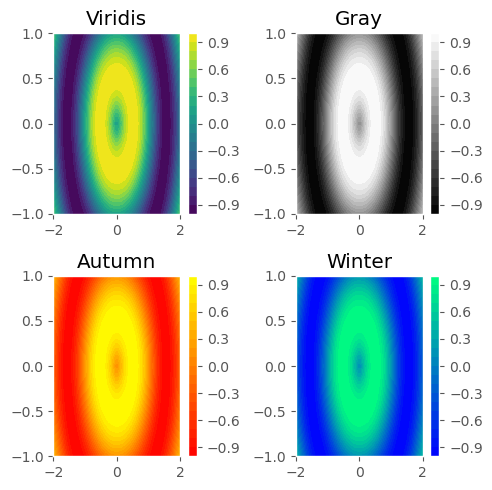

<IPython.core.display.Javascript object>

In [45]:
fig, axs = plt.subplots(2, 2, figsize=(5, 5))

# Create a filled contour plot with a color map of 'viridis'
contourf1 = axs[0, 0].contourf(X, Y, Z, 20, cmap='viridis')
fig.colorbar(contourf1, ax=axs[0, 0])
axs[0, 0].set_title('Viridis')

# Create a filled contour plot with a color map of 'gray'
contourf2 = axs[0, 1].contourf(X, Y, Z, 20, cmap='gray')
fig.colorbar(contourf2, ax=axs[0, 1])
axs[0, 1].set_title('Gray')

# Create a filled contour plot with a color map of 'autumn'
contourf3 = axs[1, 0].contourf(X, Y, Z, 20, cmap='autumn')
fig.colorbar(contourf3, ax=axs[1, 0])
axs[1, 0].set_title('Autumn')

# Create a filled contour plot with a color map of 'winter'
contourf4 = axs[1, 1].contourf(X, Y, Z, 20, cmap='winter')
fig.colorbar(contourf4, ax=axs[1, 1])
axs[1, 1].set_title('Winter')

# Improve the spacing between subplots and display them
plt.tight_layout()
plt.show()


### Using hist2d()

    mpg  cyl  displ   hp  weight  accel  yr  origin              name  color  \
0  18.0    6  250.0   88    3139   14.5  71      US      ford mustang    red   
1   9.0    8  304.0  193    4732   18.5  70      US          hi 1200d  green   
2  36.1    4   91.0   60    1800   16.4  78    Asia  honda civic cvcc   blue   
3  18.5    6  250.0   98    3525   19.0  77      US      ford granada    red   
4  34.3    4   97.0   78    2188   15.8  80  Europe         audi 4000   blue   

        size marker  
0  27.370336      o  
1  62.199511      o  
2   9.000000      x  
3  34.515625      o  
4  13.298178      s  


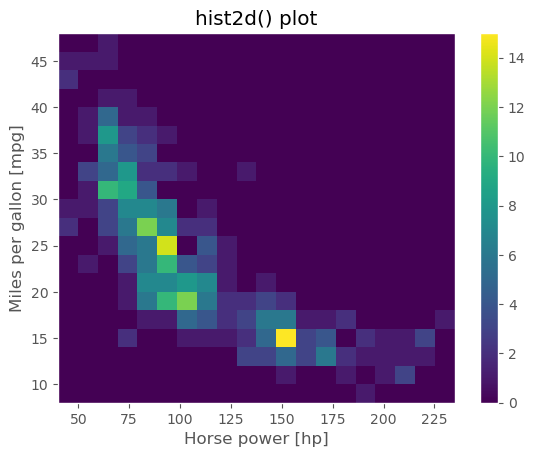

<IPython.core.display.Javascript object>

In [46]:
df2 = pd.read_csv(
    "https://assets.datacamp.com/production/course_1761/datasets/auto-mpg.csv"
)
print(df2.head())

mpg = df2["mpg"]
hp = df2["hp"]


# Generate a 2-D histogram

# bins=(nx, ny) nx is the number of bins to use in the horizontal direction
# ny is the number of bins to use in the vertical direction.
# he optional parameter required is range=((xmin, xmax), (ymin, ymax))

plt.hist2d(hp, mpg, bins=(20, 20), range=((40, 235), (8, 48)))

# Add a color bar to the histogram
plt.colorbar()

# Add labels, title, and display the plot
plt.xlabel("Horse power [hp]")
plt.ylabel("Miles per gallon [mpg]")
plt.title("hist2d() plot")
plt.show()

### Using hexbin()

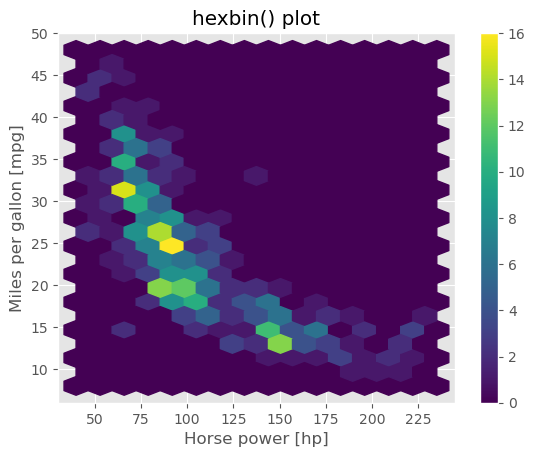

<IPython.core.display.Javascript object>

In [47]:
# Generate a 2d histogram with hexagonal bins
# Specify a hexagonal tesselation with 15 hexagons across the x-direction and 12 hexagons across the y-direction
# using gridsize

plt.hexbin(hp, mpg, gridsize=(15, 12), extent=(40, 235, 8, 48))

# Add a color bar to the histogram
plt.colorbar()

# Add labels, title, and display the plot
plt.xlabel("Horse power [hp]")
plt.ylabel("Miles per gallon [mpg]")
plt.title("hexbin() plot")
plt.show()

## Statistical plots with Seaborn

    mpg  cyl  displ   hp  weight  accel  yr  origin              name  color  \
0  18.0    6  250.0   88    3139   14.5  71      US      ford mustang    red   
1   9.0    8  304.0  193    4732   18.5  70      US          hi 1200d  green   
2  36.1    4   91.0   60    1800   16.4  78    Asia  honda civic cvcc   blue   
3  18.5    6  250.0   98    3525   19.0  77      US      ford granada    red   
4  34.3    4   97.0   78    2188   15.8  80  Europe         audi 4000   blue   

        size marker  
0  27.370336      o  
1  62.199511      o  
2   9.000000      x  
3  34.515625      o  
4  13.298178      s  


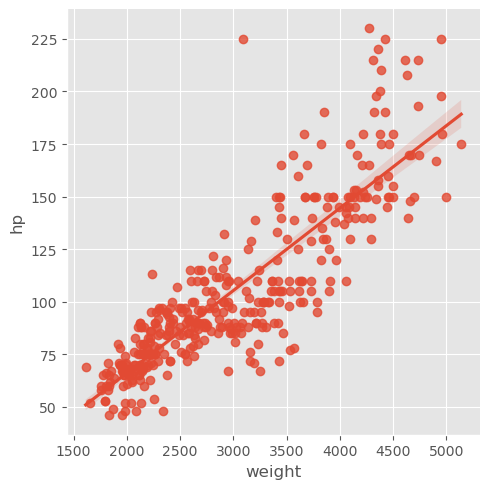

<IPython.core.display.Javascript object>

In [48]:
auto = pd.read_csv(
    "https://assets.datacamp.com/production/course_1761/datasets/auto-mpg.csv"
)

print(auto.head())

weight = auto["weight"]
hp = auto["hp"]

# Import plotting modules
import matplotlib.pyplot as plt


# Plot a linear regression between 'weight' and 'hp'
sns.lmplot(x="weight", y="hp", data=auto)

# Display the plot
plt.show()

### Plotting residuals of a regression

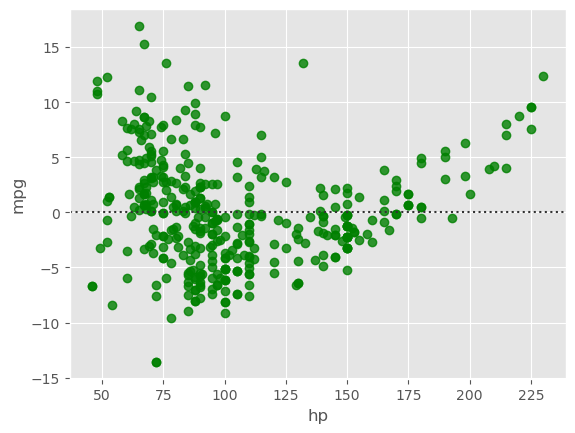

<IPython.core.display.Javascript object>

In [49]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a green residual plot of the regression between 'hp' and 'mpg'
sns.residplot(x="hp", y="mpg", data=auto, color="green")

# Display the plot
plt.show()

### Higher-order regressions

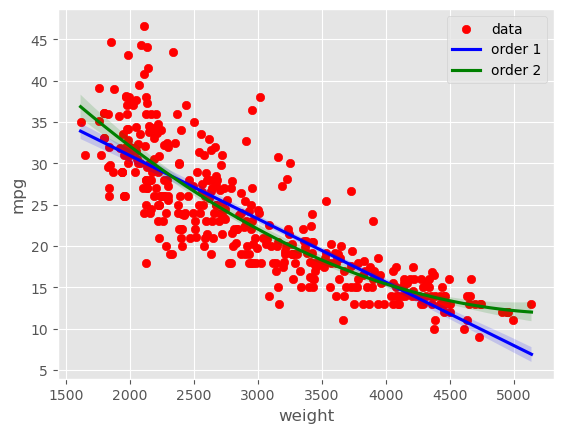

<IPython.core.display.Javascript object>

In [50]:
# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(auto["weight"], auto["mpg"], label="data", color="red", marker="o")

# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
sns.regplot(x="weight", y="mpg", data=auto, scatter=None, color="blue", label="order 1")

# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(
    x="weight",
    y="mpg",
    data=auto,
    scatter=None,
    color="green",
    label="order 2",
    order=2,
)

# Add a legend and display the plot
plt.legend(loc="upper right")
plt.show()

### Grouping linear regressions by hue

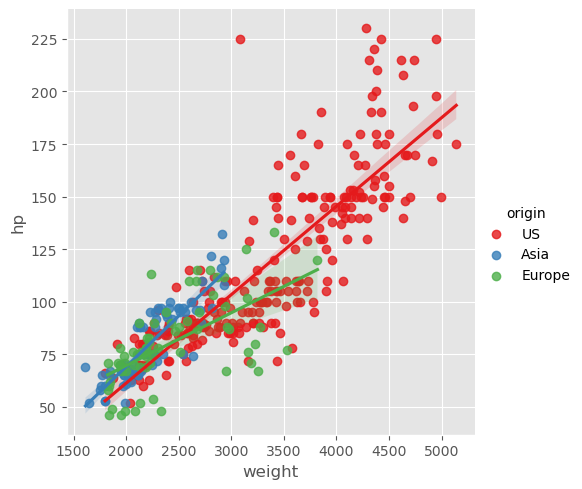

<IPython.core.display.Javascript object>

In [51]:
# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'

sns.lmplot(x="weight", y="hp", data=auto, hue="origin", palette="Set1")

# Display the plot
plt.show()

### Grouping linear regressions by row or column

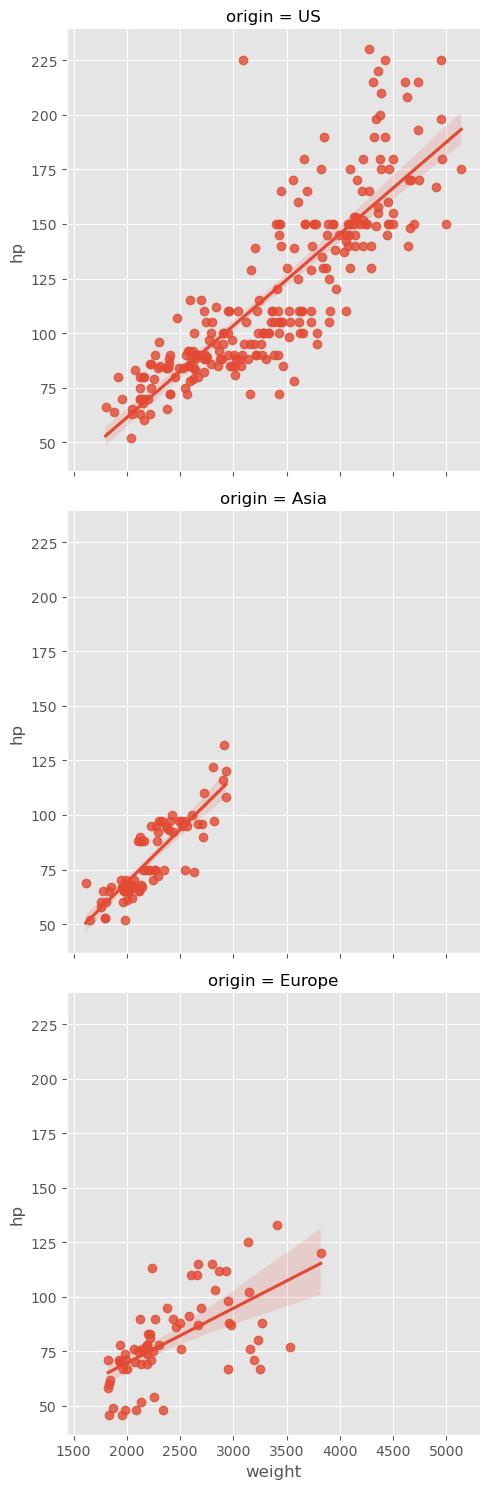

<IPython.core.display.Javascript object>

In [52]:
# Plot linear regressions between 'weight' and 'hp' grouped row-wise by 'origin'
sns.lmplot(x='weight', y='hp', data=auto, row='origin')

# Display the plot
plt.show()


### Constructing strip plots

Regressions are useful to understand relationships between two continuous variables. Often we want to explore how the distribution of a single continuous variable is affected by a second categorical variable. Seaborn provides a variety of plot types to perform these types of comparisons between univariate distributions.

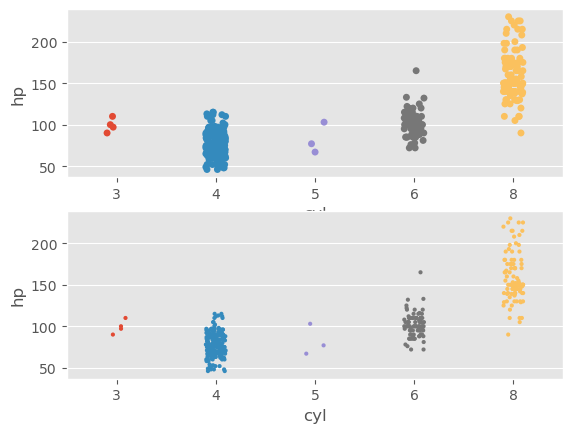

<IPython.core.display.Javascript object>

In [53]:
# Make a strip plot of 'hp' grouped by 'cyl'
plt.subplot(2, 1, 1)
sns.stripplot(x="cyl", y="hp", data=auto)

# Make the strip plot again using jitter and a smaller point size
plt.subplot(2, 1, 2)
sns.stripplot(x="cyl", y="hp", data=auto, jitter=True, size=3)

# Display the plot
plt.show()

### Constructing violin plots

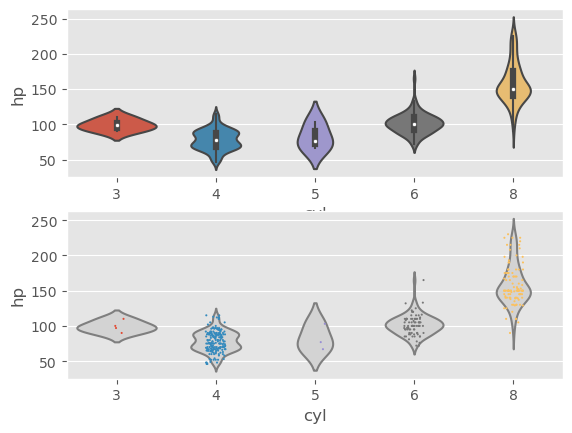

<IPython.core.display.Javascript object>

In [54]:
# Generate a violin plot of 'hp' grouped horizontally by 'cyl'
plt.subplot(2, 1, 1)
sns.violinplot(x="cyl", y="hp", data=auto)

# Generate the same violin plot again with a color of 'lightgray' and without inner annotations
plt.subplot(2, 1, 2)
sns.stripplot(x="cyl", y="hp", data=auto, jitter=True, size=1.5)

# Overlay a strip plot on the violin plot
sns.violinplot(x="cyl", y="hp", data=auto, inner=None, color="lightgray")

# Display the plot
plt.show()

### Plotting joint distributions (1)

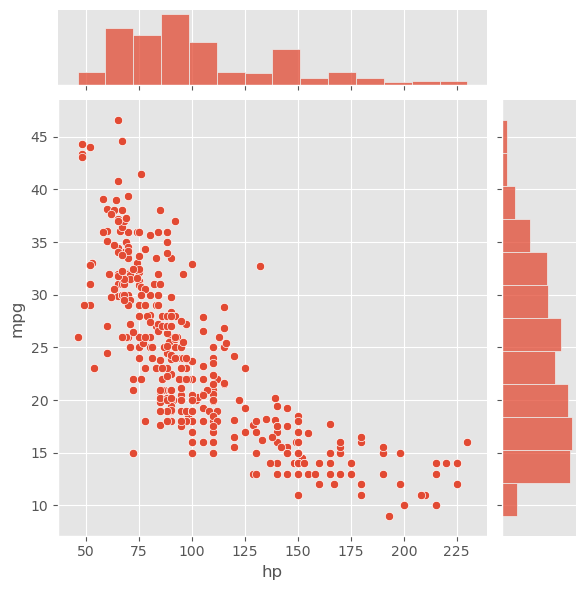

<IPython.core.display.Javascript object>

In [55]:
# Generate a joint plot of 'hp' and 'mpg'
sns.jointplot(x="hp", y="mpg", data=auto)

# Display the plot
plt.show()

### Plotting joint distributions (2)

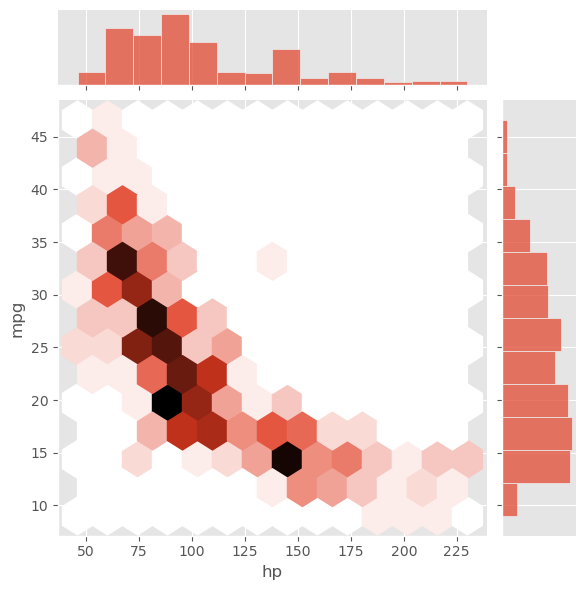

<IPython.core.display.Javascript object>

In [56]:
# Generate a joint plot of 'hp' and 'mpg' using a hexbin plot
sns.jointplot(x="hp", y="mpg", data=auto, kind="hex")

# Display the plot
plt.show()

### Plotting distributions pairwise (1)

    mpg  cyl  displ   hp  weight  accel  yr  origin              name  color  \
0  18.0    6  250.0   88    3139   14.5  71      US      ford mustang    red   
1   9.0    8  304.0  193    4732   18.5  70      US          hi 1200d  green   
2  36.1    4   91.0   60    1800   16.4  78    Asia  honda civic cvcc   blue   
3  18.5    6  250.0   98    3525   19.0  77      US      ford granada    red   
4  34.3    4   97.0   78    2188   15.8  80  Europe         audi 4000   blue   

        size marker  
0  27.370336      o  
1  62.199511      o  
2   9.000000      x  
3  34.515625      o  
4  13.298178      s  


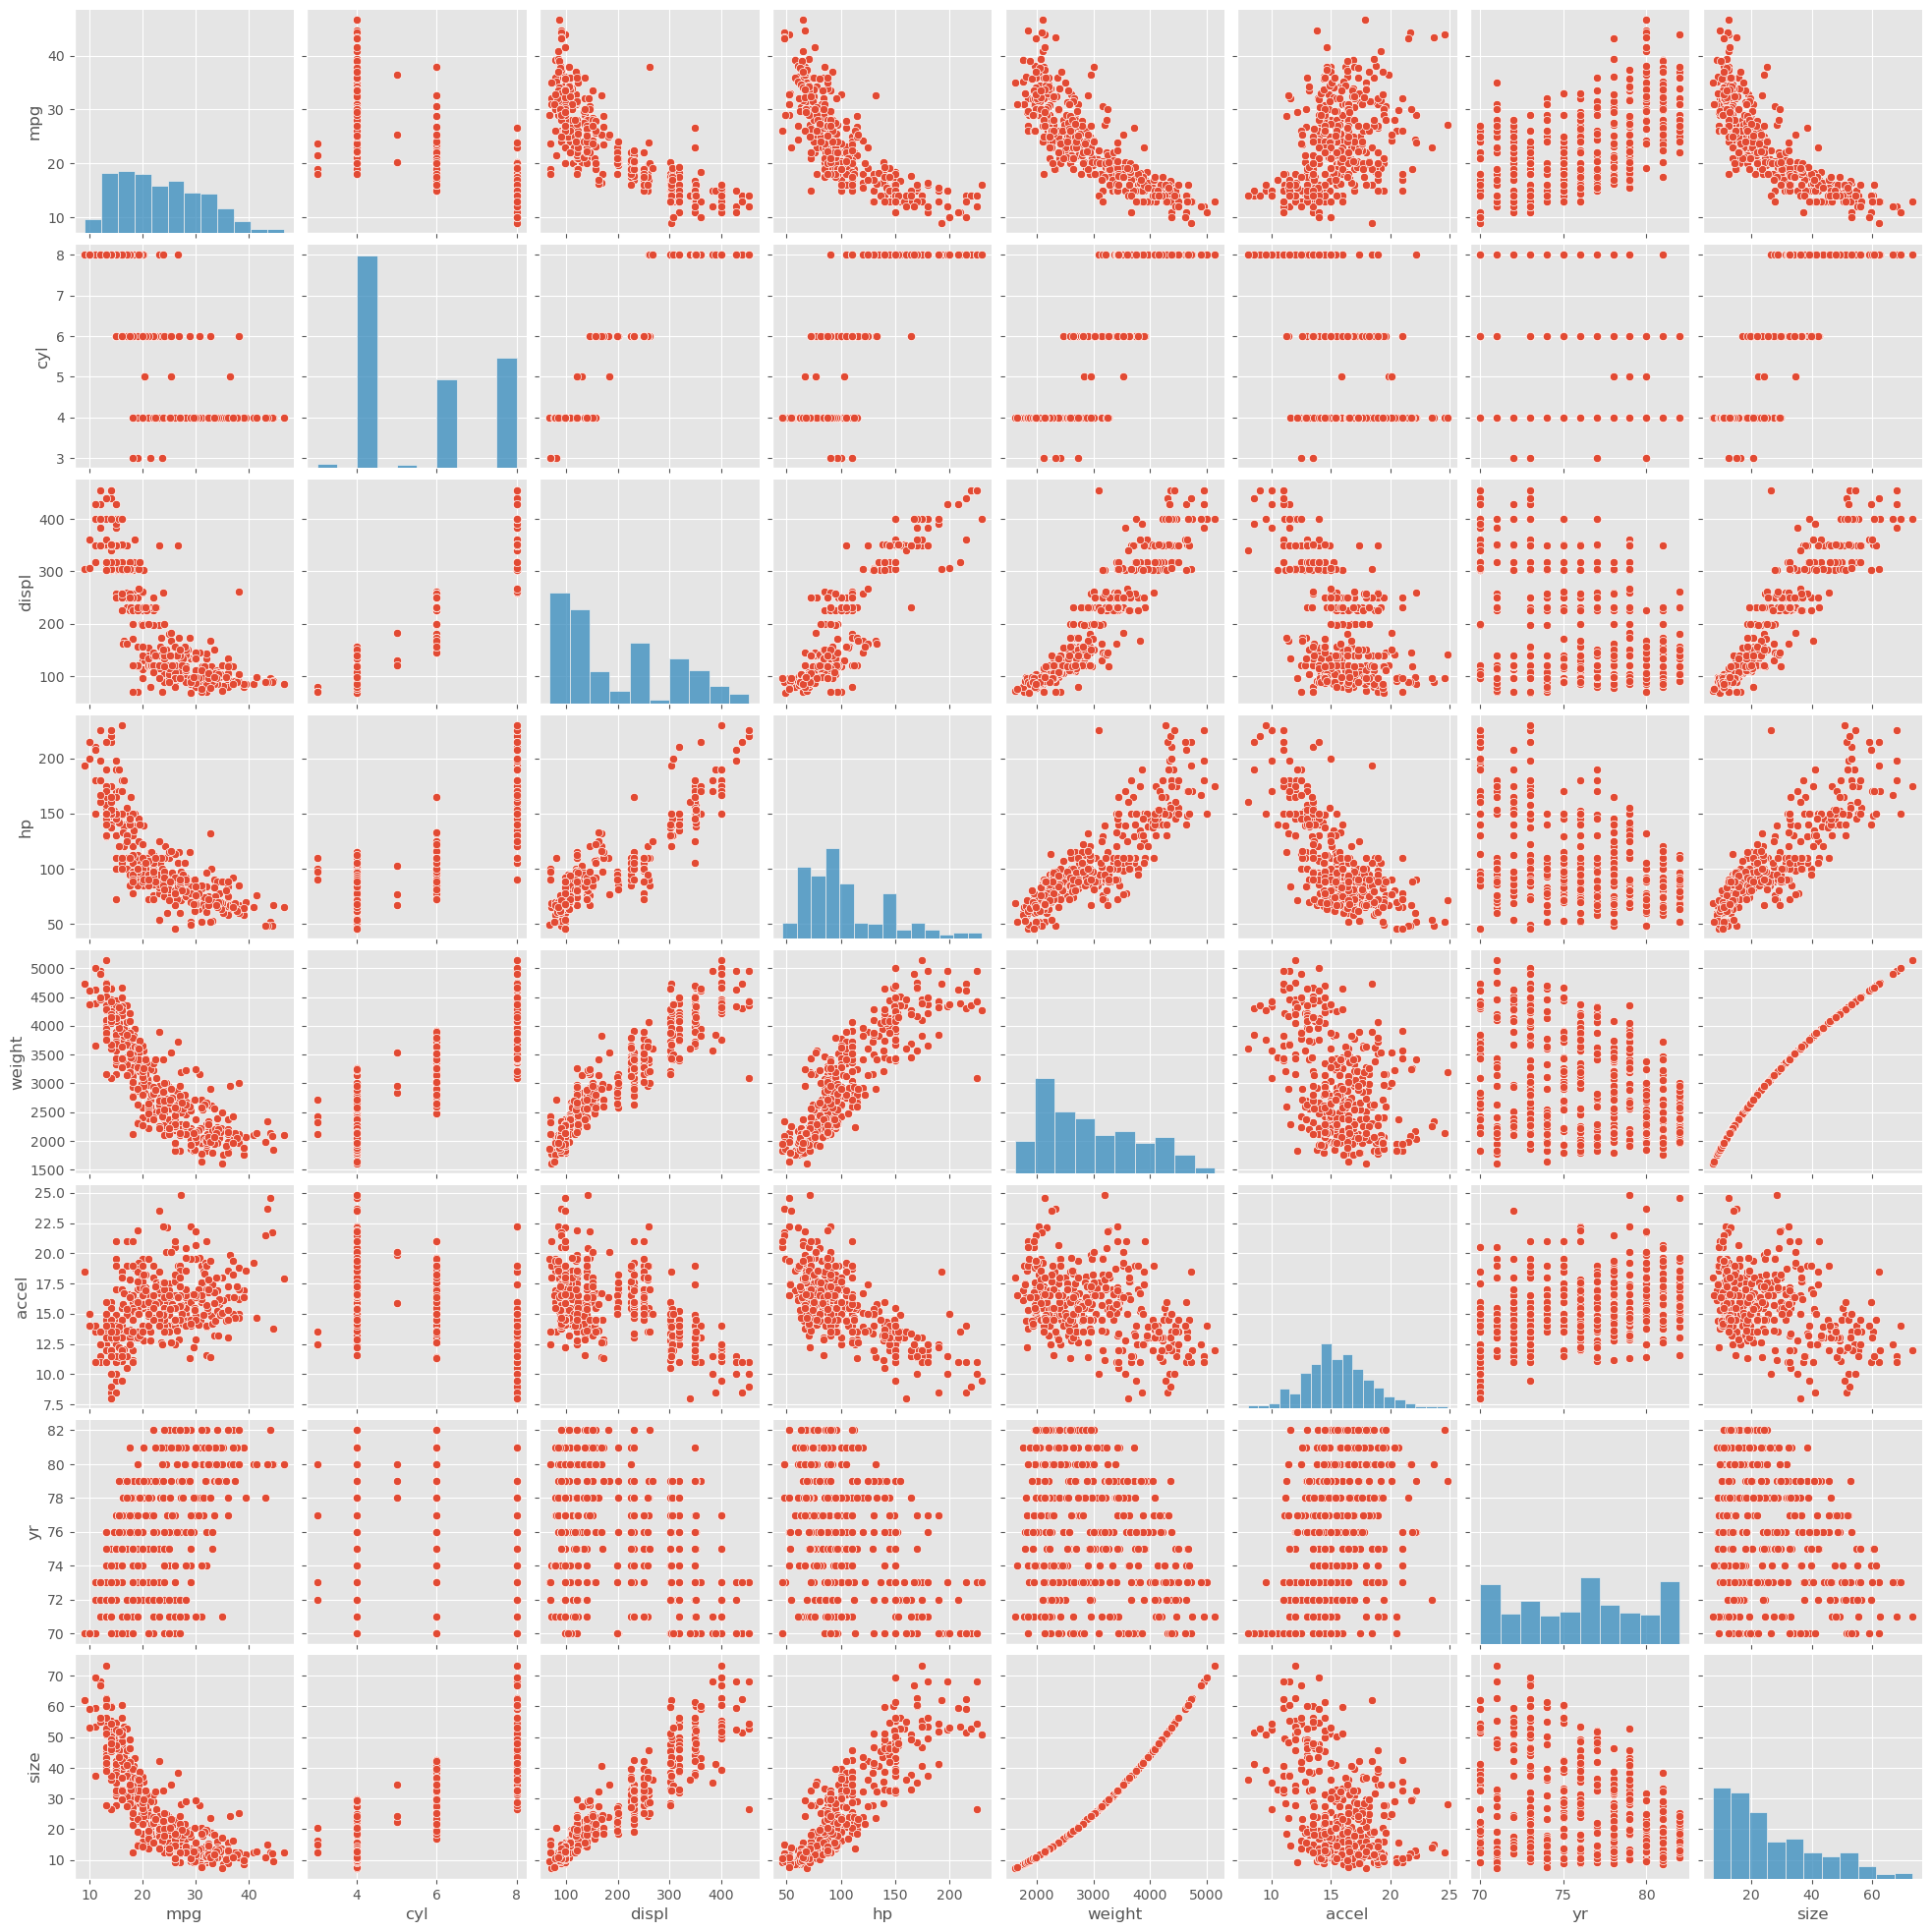

<IPython.core.display.Javascript object>

In [57]:
# Print the first 5 rows of the DataFrame
print(auto.head())

# Plot the pairwise joint distributions from the DataFrame
sns.pairplot(auto)

# Display the plot
plt.show()

### Plotting distributions pairwise (2)

    mpg  cyl  displ   hp  weight  accel  yr  origin              name  color  \
0  18.0    6  250.0   88    3139   14.5  71      US      ford mustang    red   
1   9.0    8  304.0  193    4732   18.5  70      US          hi 1200d  green   
2  36.1    4   91.0   60    1800   16.4  78    Asia  honda civic cvcc   blue   
3  18.5    6  250.0   98    3525   19.0  77      US      ford granada    red   
4  34.3    4   97.0   78    2188   15.8  80  Europe         audi 4000   blue   

        size marker  
0  27.370336      o  
1  62.199511      o  
2   9.000000      x  
3  34.515625      o  
4  13.298178      s  


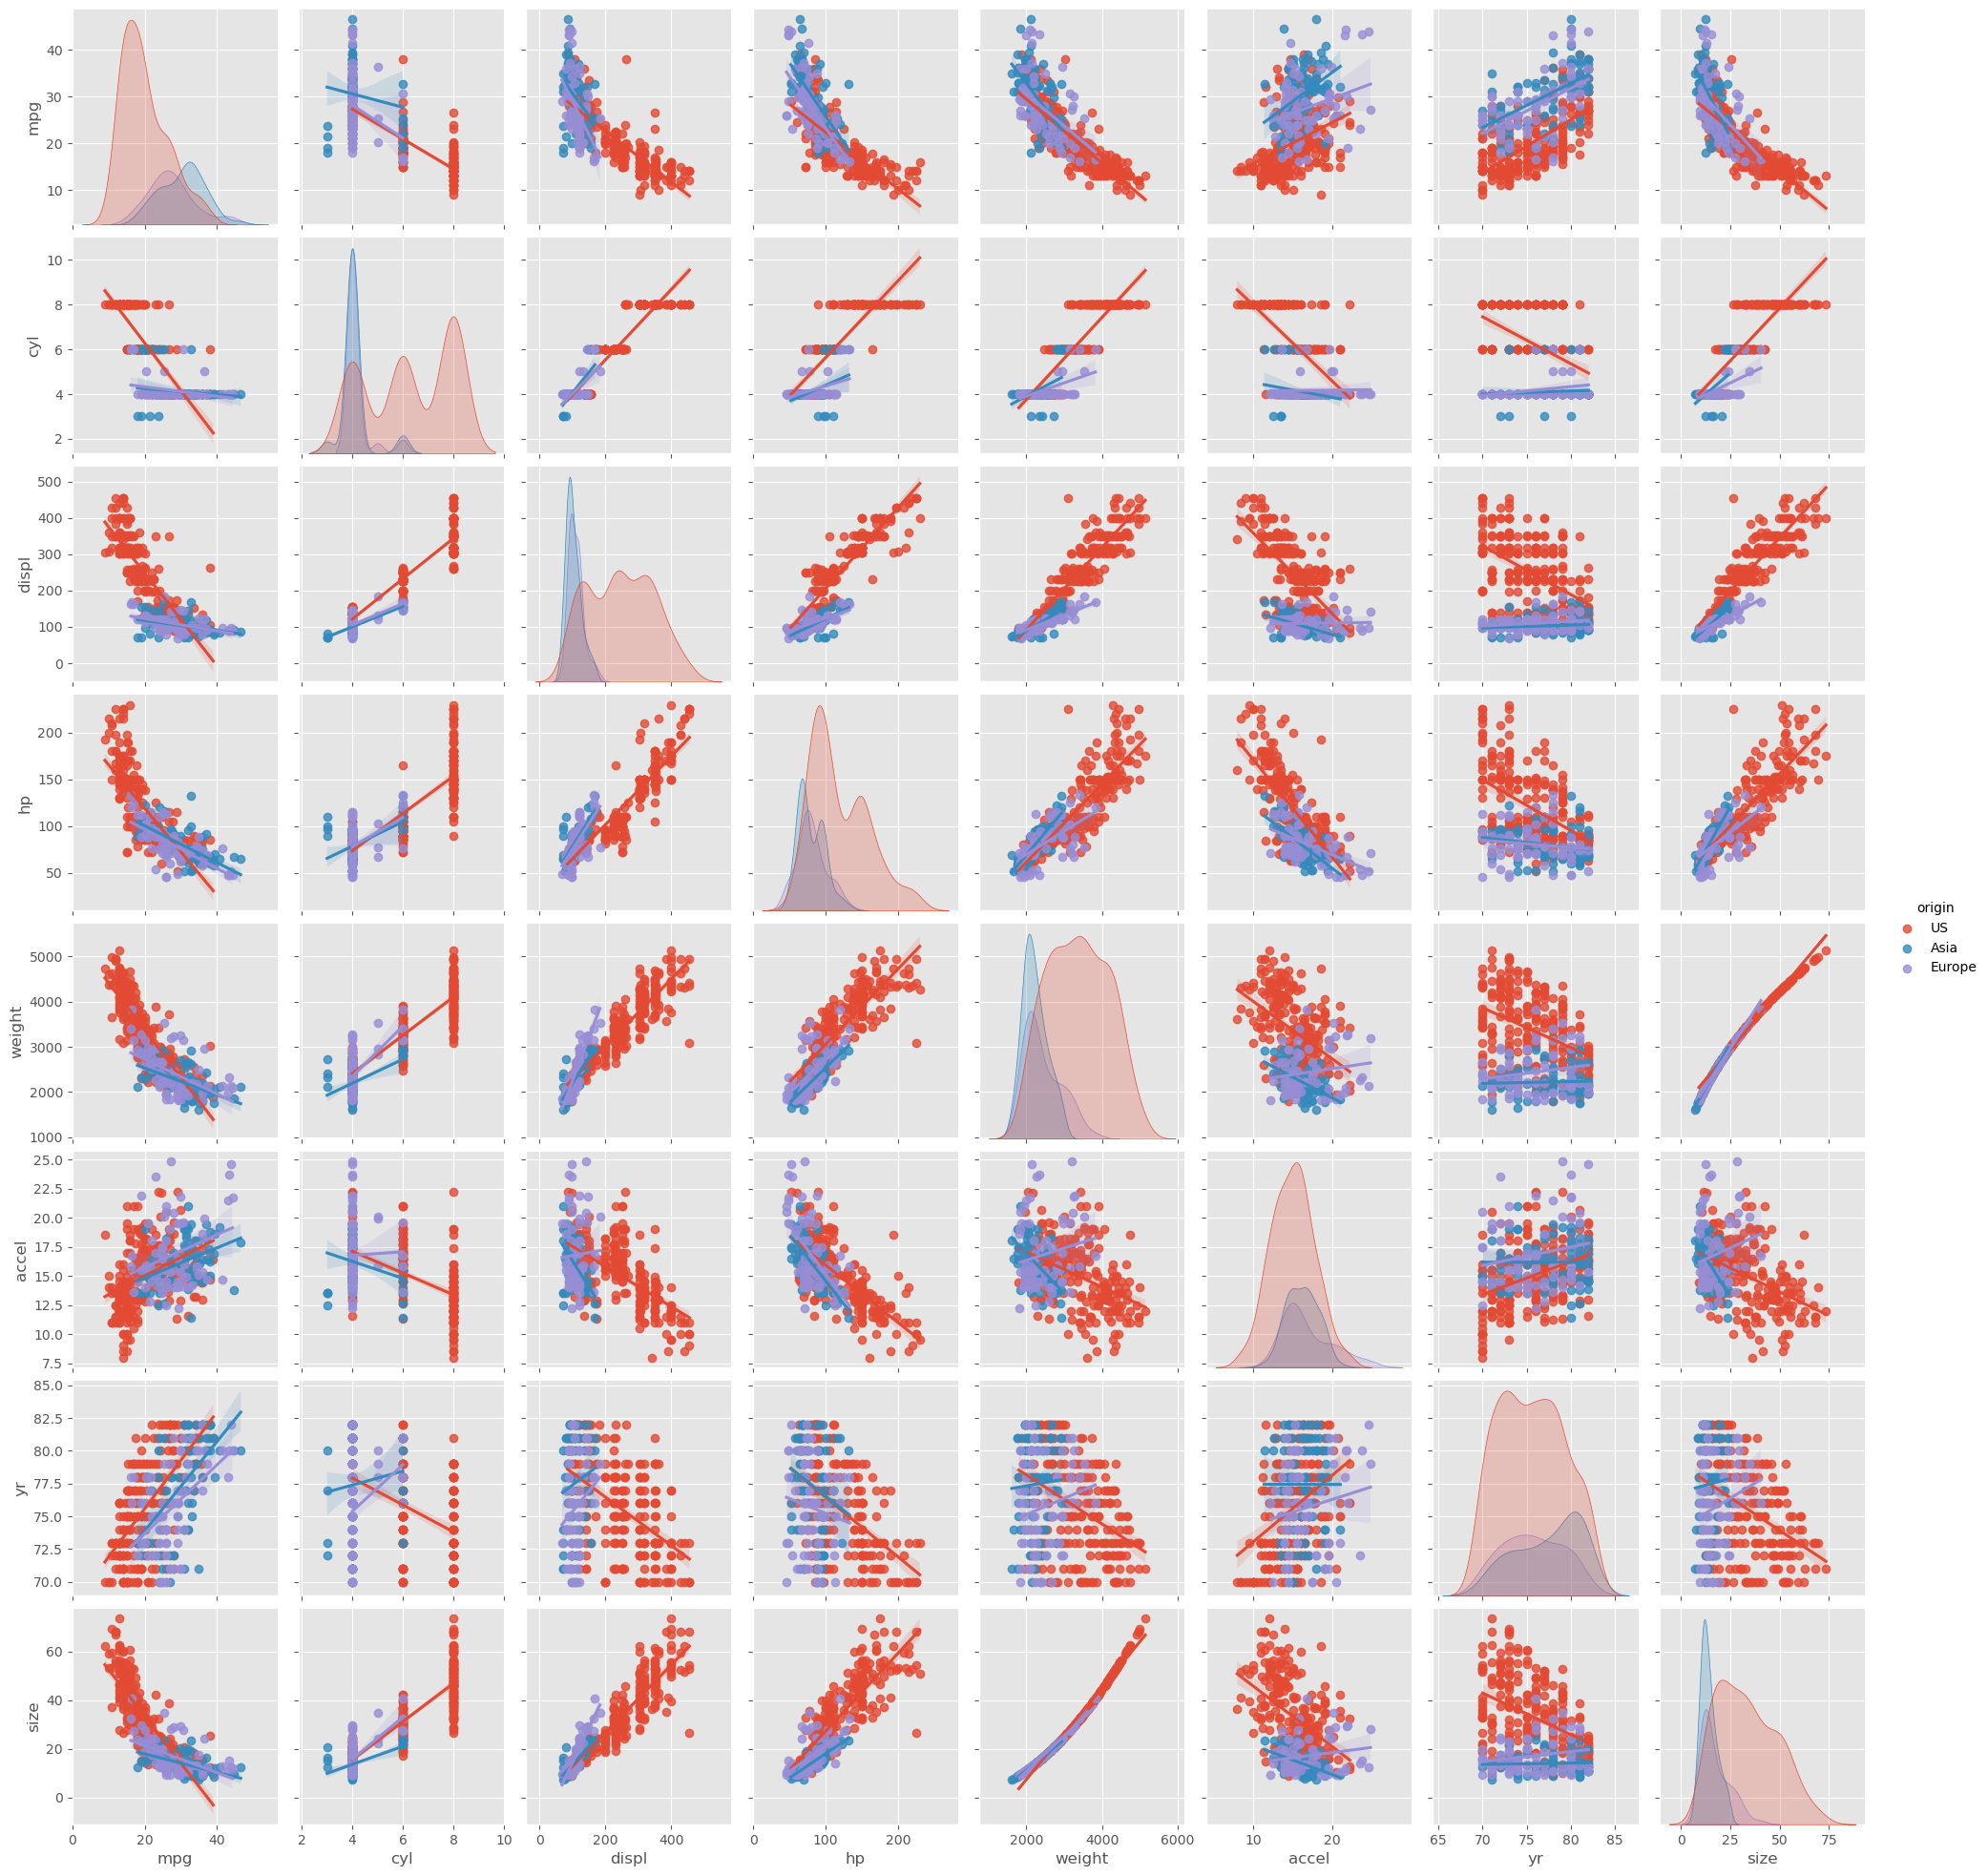

<IPython.core.display.Javascript object>

In [58]:
# Print the first 5 rows of the DataFrame
print(auto.head())

# Plot the pairwise joint distributions grouped by 'origin' along with regression lines
sns.pairplot(auto, hue="origin", kind="reg")

# Display the plot
plt.show()

### Visualizing correlations with a heatmap

             mpg       cyl     displ        hp    weight     accel        yr  \
mpg     1.000000 -0.777618 -0.805127 -0.778427 -0.832244  0.423329  0.580541   
cyl    -0.777618  1.000000  0.950823  0.842983  0.897527 -0.504683 -0.345647   
displ  -0.805127  0.950823  1.000000  0.897257  0.932994 -0.543800 -0.369855   
hp     -0.778427  0.842983  0.897257  1.000000  0.864538 -0.689196 -0.416361   
weight -0.832244  0.897527  0.932994  0.864538  1.000000 -0.416839 -0.309120   
accel   0.423329 -0.504683 -0.543800 -0.689196 -0.416839  1.000000  0.290316   
yr      0.580541 -0.345647 -0.369855 -0.416361 -0.309120  0.290316  1.000000   
size   -0.806682  0.890839  0.928779  0.869720  0.992019 -0.426547 -0.325214   

            size  
mpg    -0.806682  
cyl     0.890839  
displ   0.928779  
hp      0.869720  
weight  0.992019  
accel  -0.426547  
yr     -0.325214  
size    1.000000  


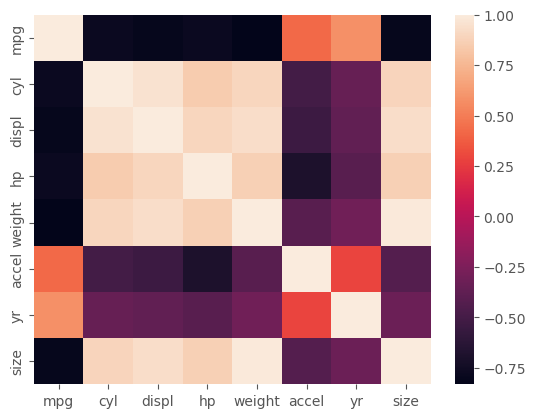

<IPython.core.display.Javascript object>

In [59]:
# Create and print the covariance matrix
cov_matrix = auto.corr()
print(cov_matrix)

# Visualize the covariance matrix using a heatmap
sns.heatmap(cov_matrix)

# Display the heatmap
plt.show()

# Visualizing time series and images

### Cumulative Distribution Function from an image histogram

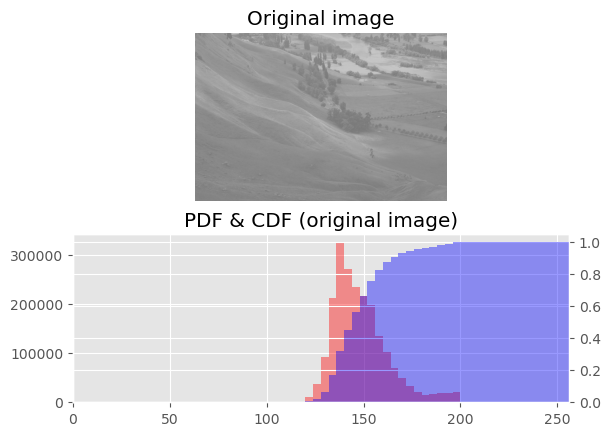

<IPython.core.display.Javascript object>

In [60]:
# Load the image into an array: image
image = plt.imread("images/Unequalized_Hawkes_Bay_NZ.jpg")

# Display image in top subplot using color map 'gray'
plt.subplot(2, 1, 1)
plt.imshow(image, cmap="gray")
plt.title("Original image")
plt.axis("off")

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2, 1, 2)
pdf = plt.hist(pixels, bins=64, range=(0, 256), density=False, color="red", alpha=0.4)
plt.grid("off")
# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()

# Display a cumulative histogram of the pixels
cdf = plt.hist(
    pixels,
    bins=64,
    range=(0, 256),
    density=True,
    cumulative=True,
    color="blue",
    alpha=0.4,
)

# Specify x-axis range, hide axes, add title and display plot
plt.xlim((0, 256))
plt.grid("off")
plt.title("PDF & CDF (original image)")
plt.show()

### Equalizing an image histogram

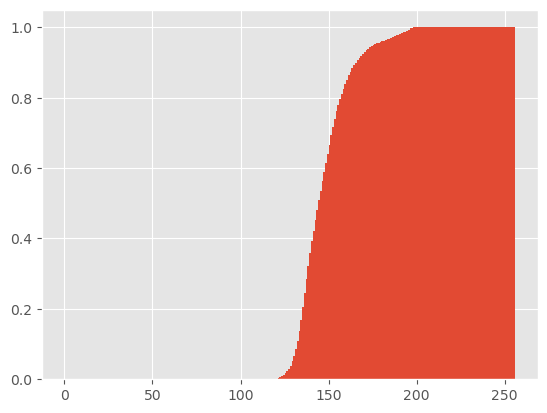

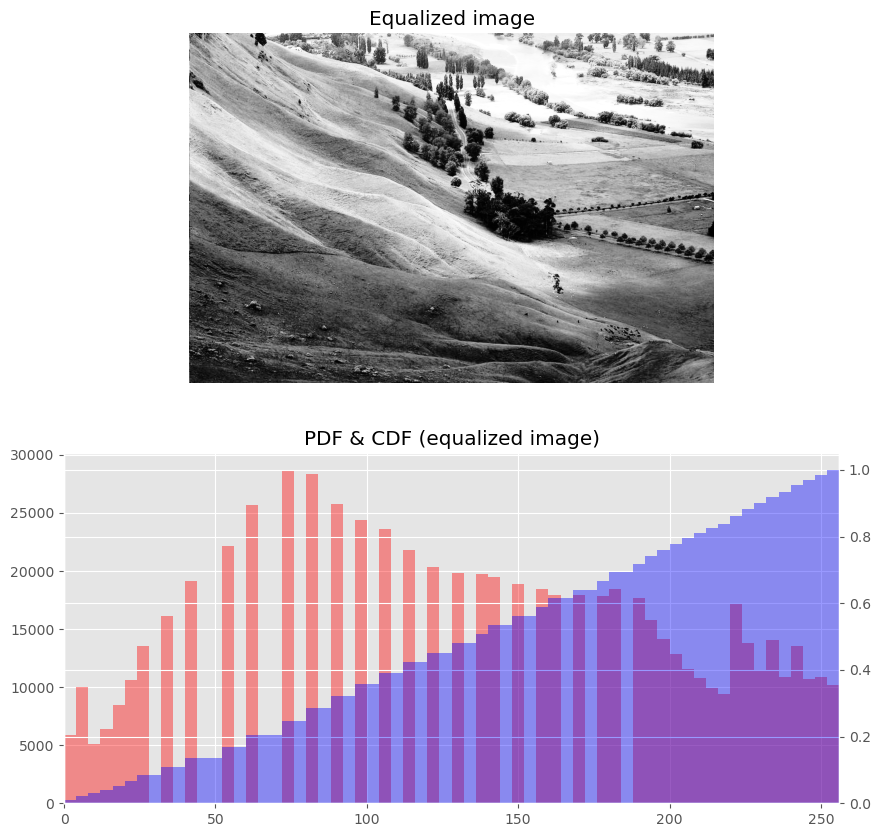

<IPython.core.display.Javascript object>

In [61]:
# Load the image into an array: image
image = plt.imread('images/Unequalized_Hawkes_Bay_NZ.jpg')

# Convert the image to grayscale if it's a color image
if len(image.shape) == 3:
    image = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Generate a cumulative histogram
cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256), density=True, cumulative=True)
new_pixels = np.interp(pixels, bins[:-1], cdf*255)

# Reshape new_pixels as a 2-D array: new_image
new_image = new_pixels.reshape(image.shape)

# Display the new image with 'gray' color map
plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
plt.title('Equalized image')
plt.axis('off')
plt.imshow(new_image, cmap='gray')

# Generate a histogram of the new pixels
plt.subplot(2,1,2)
pdf = plt.hist(new_pixels, bins=64, range=(0,256), density=False,
               color='red', alpha=0.4)

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()
plt.xlim((0,256))

# Add title
plt.title('PDF & CDF (equalized image)')

# Generate a cumulative histogram of the new pixels
cdf = plt.hist(new_pixels, bins=64, range=(0,256),
               density=True, 
               cumulative=True, color='blue', alpha=0.4)

plt.show()


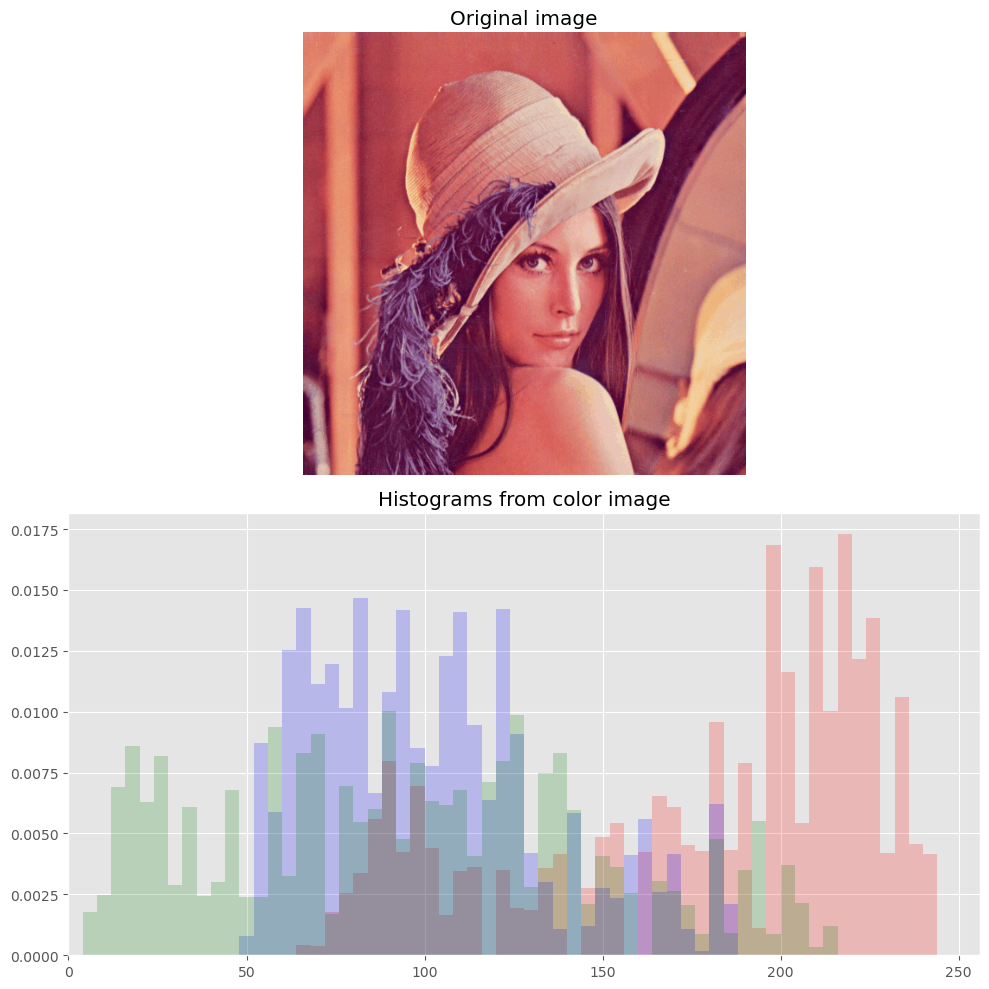

<IPython.core.display.Javascript object>

In [62]:
# Load the image into an array: image
image = plt.imread("images/lena_color.gif")

# Display image in top subplot
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.title("Original image")
plt.axis("off")
plt.imshow(image)

# Extract 2-D arrays of the RGB channels: red, blue, green
red, green, blue = image[:, :, 0], image[:, :, 1], image[:, :, 2]

# Flatten the 2-D arrays of the RGB channels into 1-D
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Overlay histograms of the pixels of each color in the bottom subplot
plt.subplot(2, 1, 2)
plt.title("Histograms from color image")
plt.xlim((0, 256))
plt.hist(red_pixels, bins=64, range=(0, 256), density=True, color="red", alpha=0.2)
plt.hist(blue_pixels, bins=64, range=(0, 256), density=True, color="blue", alpha=0.2)
plt.hist(green_pixels, bins=64, range=(0, 256), density=True, color="green", alpha=0.2)

# Display the plot
plt.tight_layout()
plt.show()

### Extracting bivariate histograms from a color image

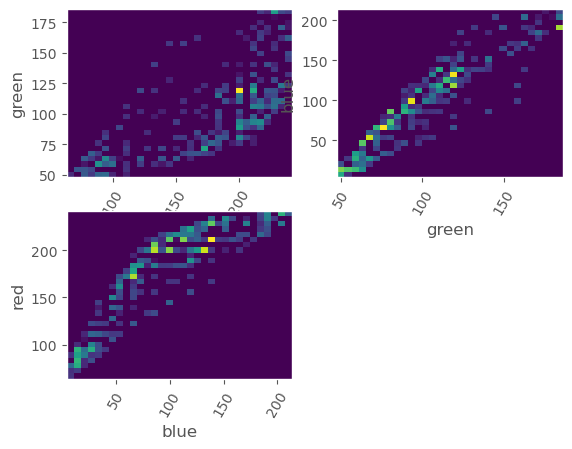

<IPython.core.display.Javascript object>

In [63]:
# Load the image into an array: image
image = plt.imread("images/lena_color.gif")

# Extract RGB channels and flatten into 1-D array
red, blue, green = image[:, :, 0], image[:, :, 1], image[:, :, 2]
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Generate a 2-D histogram of the red and green pixels
plt.subplot(2, 2, 1)
plt.grid("off")
plt.xticks(rotation=60)
plt.xlabel("red")
plt.ylabel("green")
plt.hist2d(x=red_pixels, y=green_pixels, bins=(32, 32))

# Generate a 2-D histogram of the green and blue pixels
plt.subplot(2, 2, 2)
plt.grid("off")
plt.xticks(rotation=60)
plt.xlabel("green")
plt.ylabel("blue")
plt.hist2d(x=green_pixels, y=blue_pixels, bins=(32, 32))


# Generate a 2-D histogram of the blue and red pixels
plt.subplot(2, 2, 3)
plt.grid("off")
plt.xticks(rotation=60)
plt.xlabel("blue")
plt.ylabel("red")
plt.hist2d(x=blue_pixels, y=red_pixels, bins=(32, 32))

# Display the plot
plt.show()